In [1]:
library(ggplot2)
library(reshape2)
library(gridExtra)
library(ggplot2)
library(tidyverse)
library(gridExtra)
library(GGally)
library(plotly)
library(corrplot)
library(reshape2)
library(FactoMineR) 
library(factoextra)
library(glmnet) 
library(ggfortify)
library(pROC)
library(ROCR)
library(RColorBrewer)
library(mapview)
library(leaflet)
library(viridis)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine() masks gridExtra::combine()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attachement du package : 'plotly'


L'objet suivant est masqué depuis 'package:ggplot2':

    last_plot


L'objet suivant est masqué depuis 'package:stats':

    filter


L'objet suivant est masqué depuis 'package:graphics':

    layout


corrplot 0.92 loaded

Welcome! Want to learn more?

In [2]:
load('data/velib.RData')
summary(velib)

         Length Class      Mode     
data      181   data.frame list     
position    2   data.frame list     
dates     181   -none-     character
bonus    1189   -none-     numeric  
names    1189   -none-     character

In [3]:
# data preparation
loading = as.matrix(velib$data)
colnames(loading) = 1:ncol(loading)
rownames(loading) = velib$names

stations = 1:nrow(loading)
coord = velib$position[stations,]
coord$bonus = velib$bonus[stations]

# select exactly 7 days of data (we remove the first 13 dates)
dates = 14:181
loading = loading[stations, dates]
colnames(loading) = 1:length(dates)

head(loading)
head(coord)

,1,2,3,4,5,6,7,8,9,10,⋯,159,160,161,162,163,164,165,166,167,168
EURYALE DEHAYNIN,0.03846154,0.03846154,0.07692308,0.03846154,0.03846154,0.03846154,0.03846154,0.03846154,0.10714286,0.00000000,⋯,0.29629630,0.11111111,0.1111111,0.14814815,0.30769231,0.07692308,0.11538462,0.07692308,0.1538462,0.1538462
LEMERCIER,0.47826087,0.47826087,0.47826087,0.43478261,0.43478261,0.43478261,0.43478261,0.43478261,0.26086957,0.04347826,⋯,0.04347826,0.00000000,0.2173913,0.13043478,0.04545455,0.17391304,0.17391304,0.17391304,0.2608696,0.3913043
MEZIERES RENNES,0.21818182,0.14545455,0.12727273,0.10909091,0.10909091,0.10909091,0.09090909,0.09090909,0.05454545,0.10909091,⋯,0.25925926,0.25925926,0.2037037,0.12962963,0.14814815,0.29629630,0.31481481,0.37037037,0.3703704,0.4074074
FARMAN,0.95238095,0.95238095,0.95238095,0.95238095,0.95238095,0.95238095,0.95238095,1.00000000,1.00000000,1.00000000,⋯,1.00000000,1.00000000,0.9047619,0.85714286,0.85714286,0.85714286,0.76190476,0.76190476,0.7619048,0.7619048
QUAI DE LA RAPEE,0.92753623,0.81159420,0.73913043,0.72463768,0.72463768,0.72463768,0.72463768,0.72463768,0.75362319,0.97101449,⋯,0.22727273,0.45454545,0.5909091,0.83333333,1.00000000,0.81818182,0.63636364,0.71212121,0.6212121,0.5757576
CHOISY POINT D'IVRY,0.16666667,0.16666667,0.16666667,0.16666667,0.16666667,0.16666667,0.16666667,0.16666667,0.08333333,0.00000000,⋯,0.34782609,0.08695652,0.1153846,0.08695652,0.13043478,0.08695652,0.08695652,0.43478261,0.3913043,0.5217391


,longitude,latitude,bonus
,<dbl>,<dbl>,<dbl>
19117,2.377389,48.88630,0
17111,2.317591,48.89002,0
6103,2.330447,48.85030,0
15042,2.271396,48.83373,0
12003,2.366897,48.84589,0
13038,2.363335,48.82191,0


In [45]:
minuit_am <- rowMeans(loading[,c(1,25,49,73,97,121,145)])
une_am <- rowMeans(loading[,c(2,26,50,74,98,122,146)])
deux_am <- rowMeans(loading[,c(3,27,51,75,99,123,147)])
trois_am <- rowMeans(loading[,c(4,28,52,76,100,124,148)])
quatre_am <- rowMeans(loading[,c(5,29,53,77,101,125,149)])
cinq_am <- rowMeans(loading[,c(6,30,54,78,102,126,150)])
six_am <- rowMeans(loading[,c(7,31,55,79,103,127,151)])
sept_am <- rowMeans(loading[,c(8,32,56,80,104,128,152)])
huit_am <- rowMeans(loading[,c(9,33,57,81,105,129,153)])
neuf_am <- rowMeans(loading[,c(10,34,58,82,106,130,154)])
dix_am <- rowMeans(loading[,c(11,35,59,83,107,131,155)])
onze_am <- rowMeans(loading[,c(12,36,60,84,108,132,156)])
minuit_pm <- rowMeans(loading[,c(13,37,61,85,109,133,157)])
une_pm <- rowMeans(loading[,c(14,38,62,86,110,134,158)])
deux_pm <- rowMeans(loading[,c(15,39,63,87,111,135,159)])
trois_pm <- rowMeans(loading[,c(16,40,64,88,112,136,160)])
quatre_pm <- rowMeans(loading[,c(17,41,65,89,113,137,161)])
cinq_pm <- rowMeans(loading[,c(18,42,66,90,114,138,162)])
six_pm <- rowMeans(loading[,c(19,43,67,91,115,139,163)])
sept_pm <- rowMeans(loading[,c(20,44,68,92,116,140,164)])
huit_pm <- rowMeans(loading[,c(21,45,69,93,117,141,165)])
neuf_pm <- rowMeans(loading[,c(22,46,70,94,118,142,166)])
dix_pm <- rowMeans(loading[,c(23,47,71,95,119,143,167)])
onze_pm <- rowMeans(loading[,c(24,48,72,96,120,144,168)])

df1 <- data.frame(Minuit = minuit_am, "une h" = une_am, "2h" = deux_am, "3h" = trois_am, "4h" = quatre_am, "5h" = cinq_am, "6h" = six_am, "7h" = sept_am, "8h" = huit_am, "9h" = neuf_am
                 , "10h" = dix_am, "11h" = onze_am, "12h" = minuit_pm, "13h" = une_pm, "14h" = deux_pm, "15h" = trois_pm, "16h" = quatre_pm, "17h" = cinq_pm, "18h" = six_pm, 
                 "19h" = sept_pm, "20h" = huit_pm, "21h" = neuf_pm, "22h" = dix_pm, "23h" = onze_pm)

colnames(df1) <- list("0h", "1h", "2h","3h", "4h", "5h", "6h", "7h", "8h", "9h", "10h", "11h", "12h", "13h", "14h", "15h", "16h", "17h", "18h", "19h", "20h", "21h", "22h", "23h")
remplacer_valeurs <- function(valeur) {
  ifelse(valeur >= 0 & valeur <= 0.2, "-", 
         ifelse(valeur > 0.2 & valeur <= 0.6, "=","+"))
}
df1 <- as.data.frame(sapply(df1, remplacer_valeurs))
df1$Station <- velib$names
df1$Hill <- as.factor(coord$bonus)
df1$Station <- as.factor(df1$Station)
df1[] <- lapply(df1, as.factor)
head(df1)

,0h,1h,2h,3h,4h,5h,6h,7h,8h,9h,⋯,16h,17h,18h,19h,20h,21h,22h,23h,Station,Hill
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,=,=,=,=,=,=,=,=,=,-,⋯,-,-,-,=,=,=,=,=,EURYALE DEHAYNIN,0
2,+,+,+,+,+,+,+,+,+,=,⋯,-,-,-,=,+,+,+,+,LEMERCIER,0
3,=,=,=,=,=,=,=,=,=,=,⋯,=,=,=,=,=,=,=,=,MEZIERES RENNES,0
4,=,=,=,=,=,=,=,=,=,+,⋯,+,+,=,=,=,=,=,-,FARMAN,0
5,=,=,=,=,=,=,=,=,=,=,⋯,+,+,+,=,=,=,=,=,QUAI DE LA RAPEE,0
6,=,=,=,=,=,=,=,=,=,-,⋯,=,=,-,=,=,=,=,=,CHOISY POINT D'IVRY,0


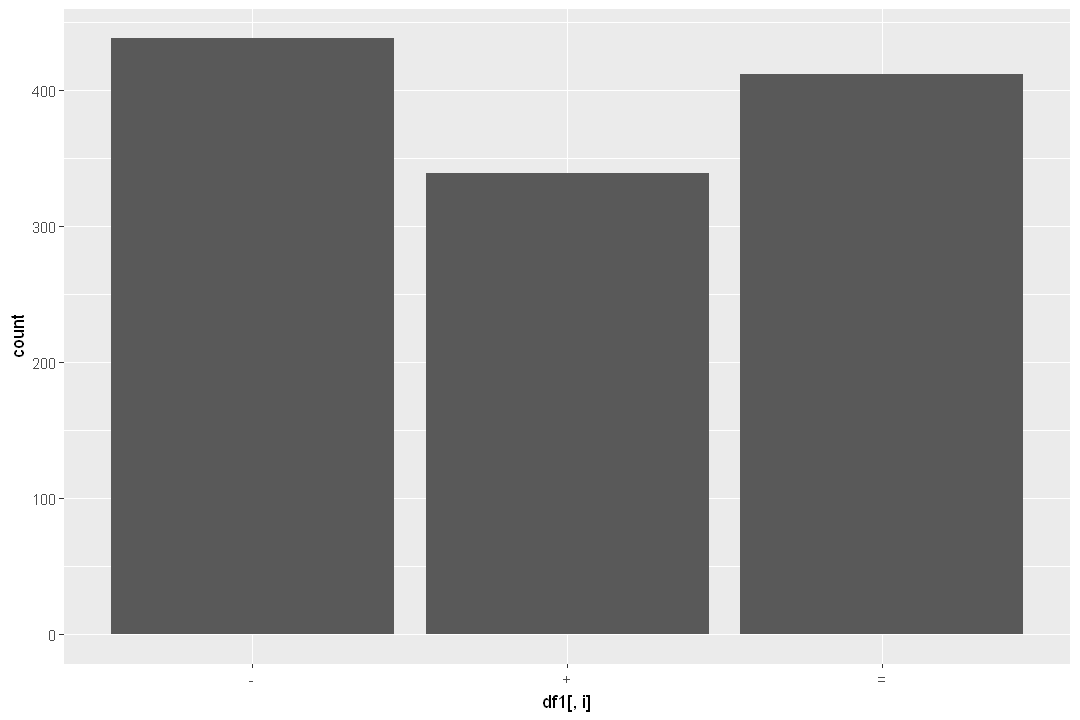

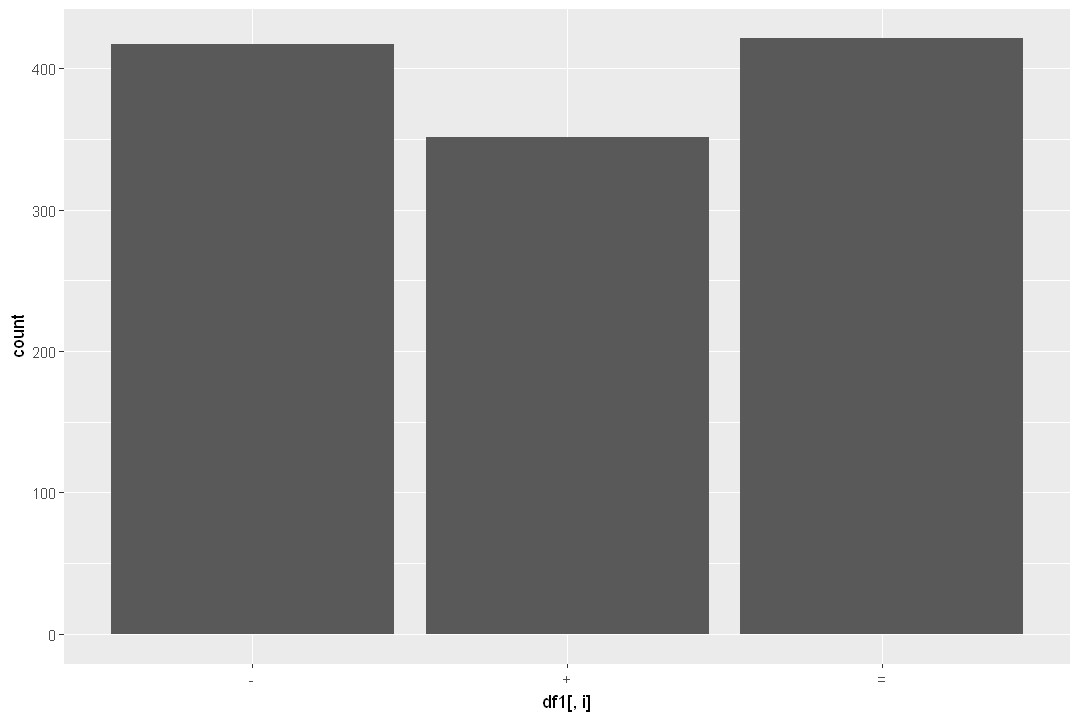

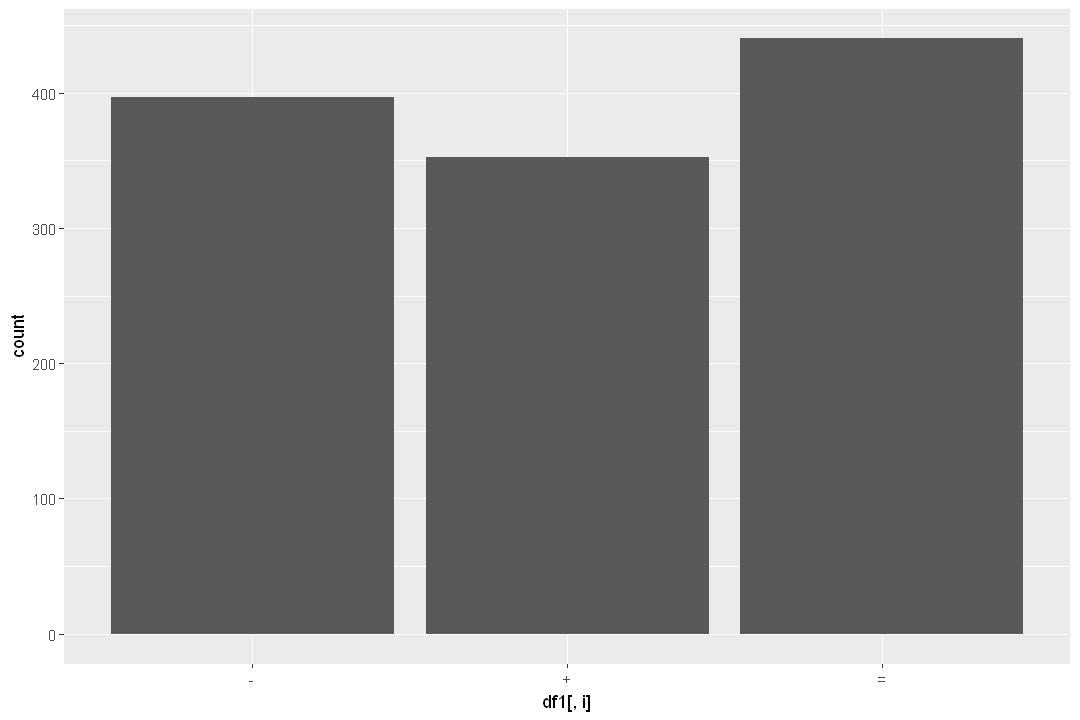

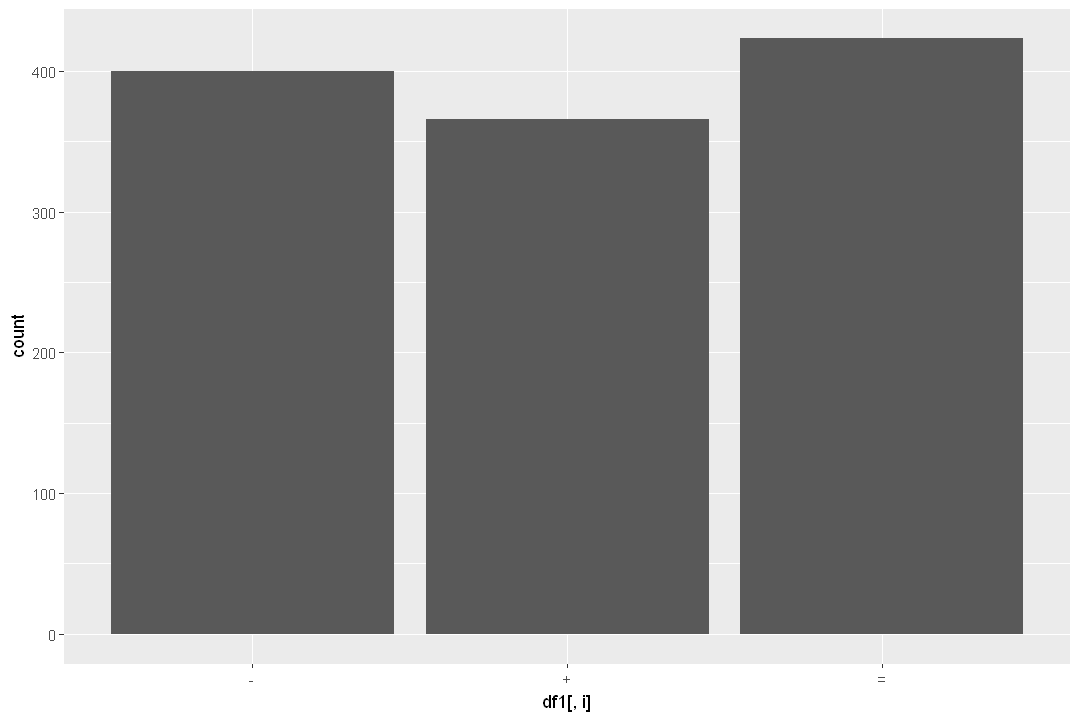

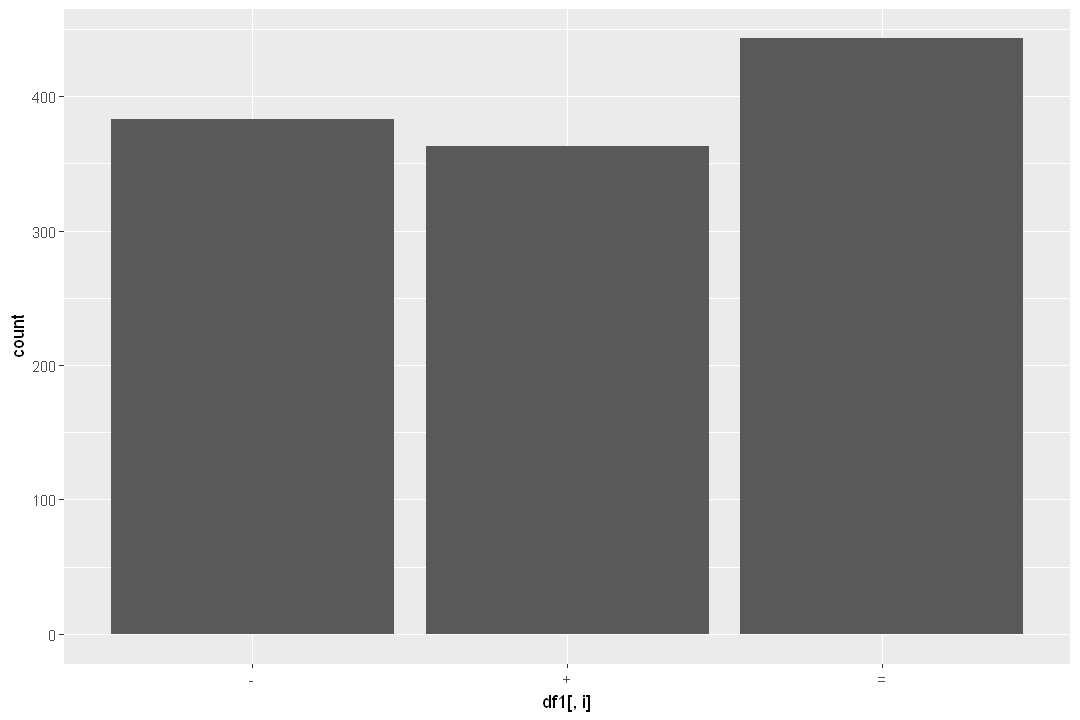

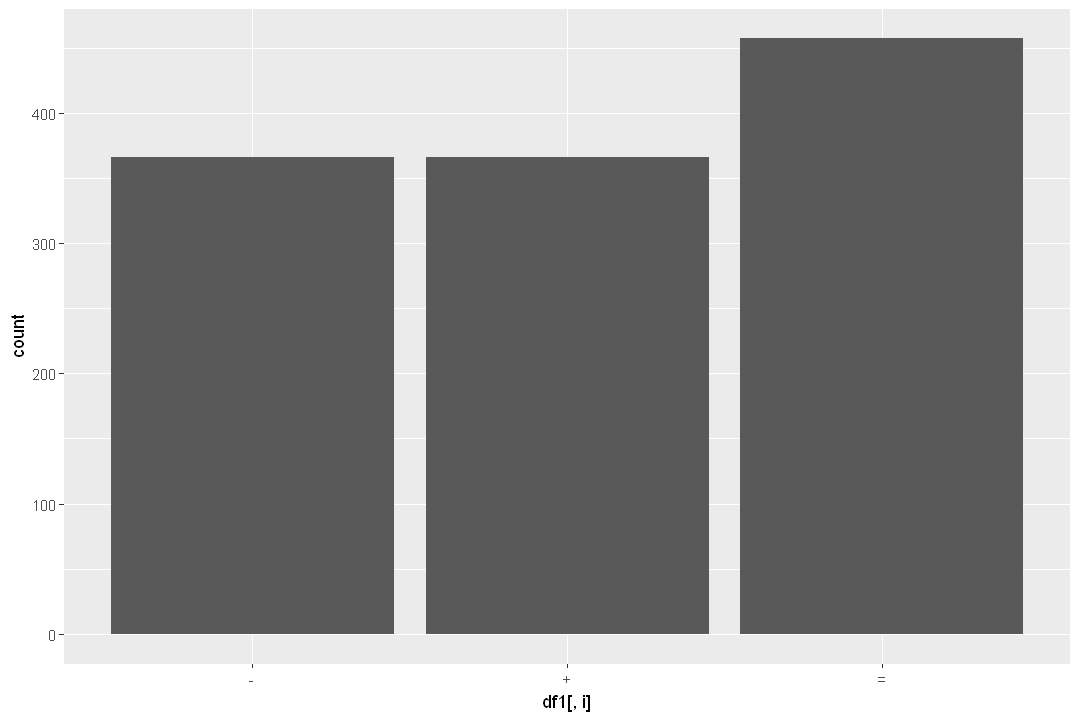

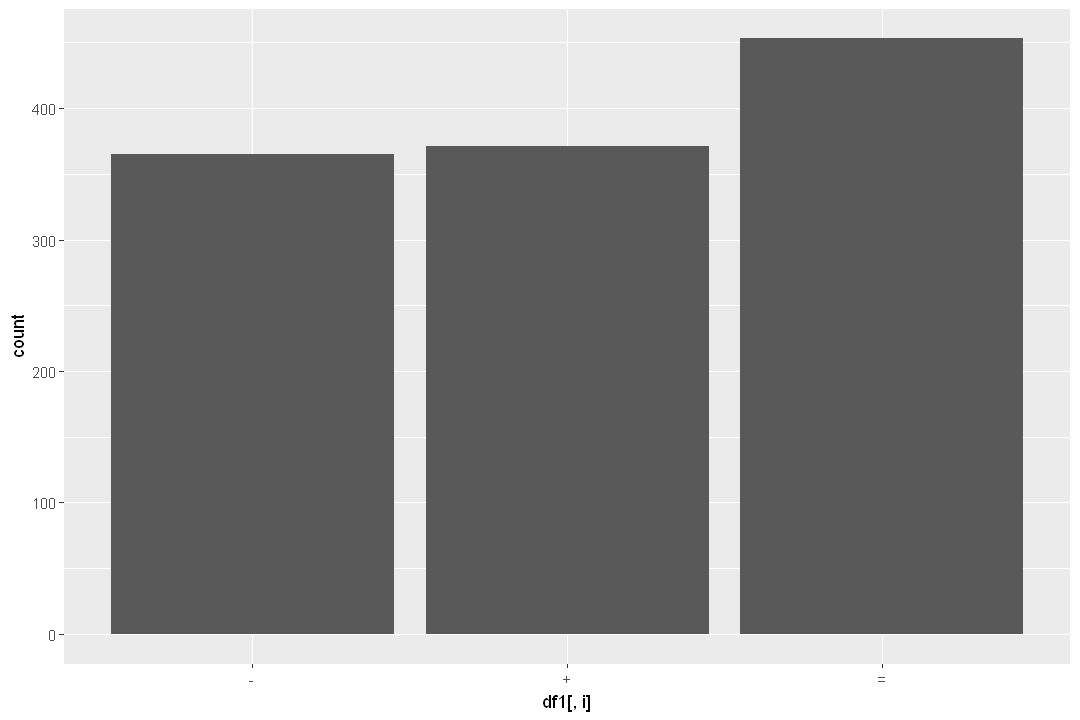

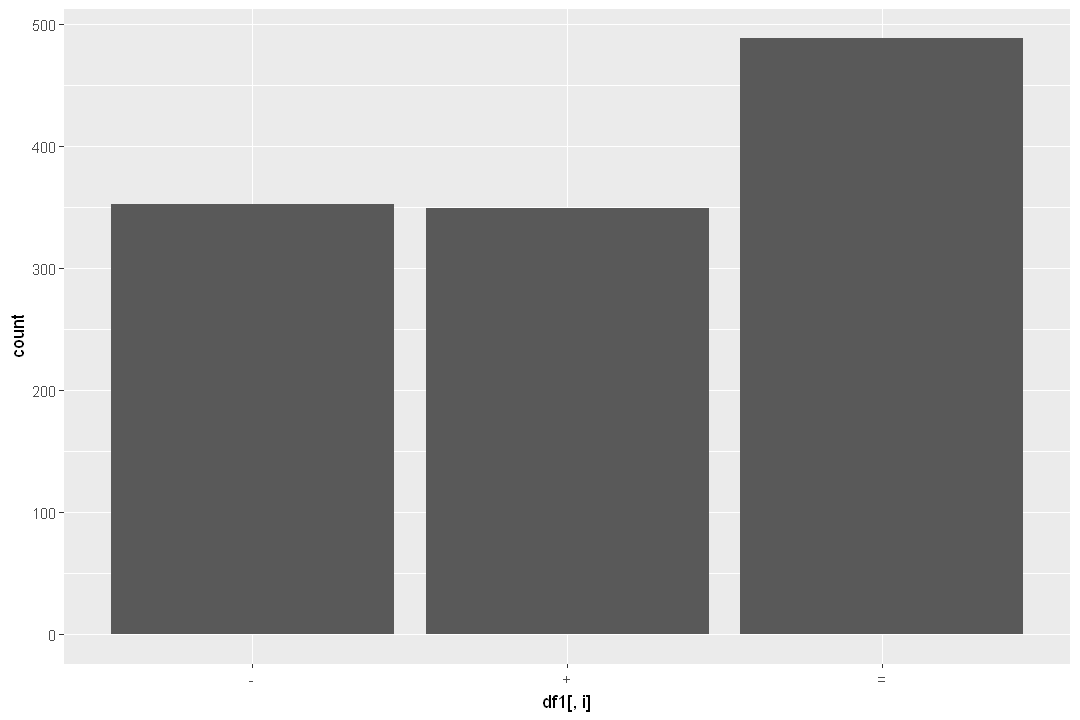

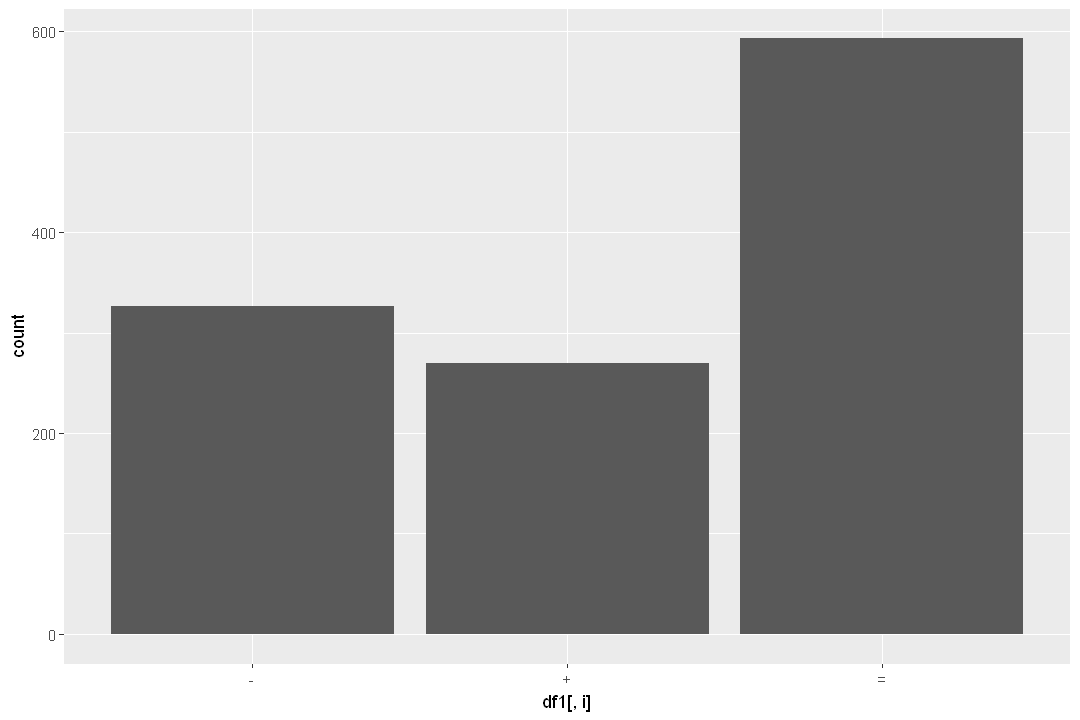

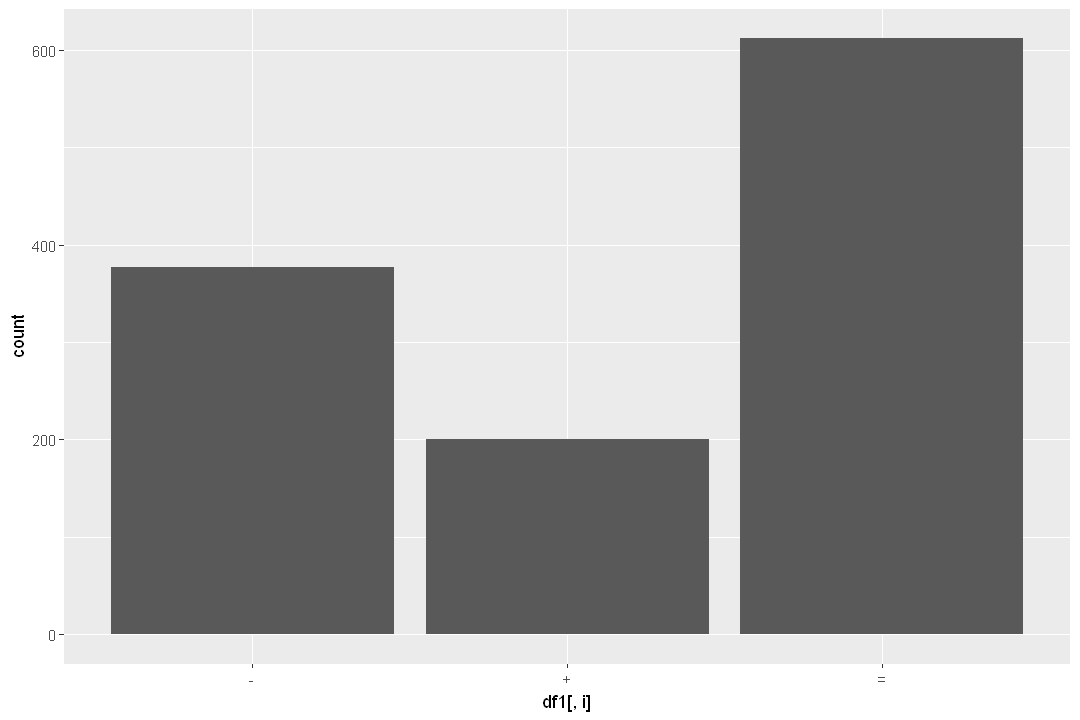

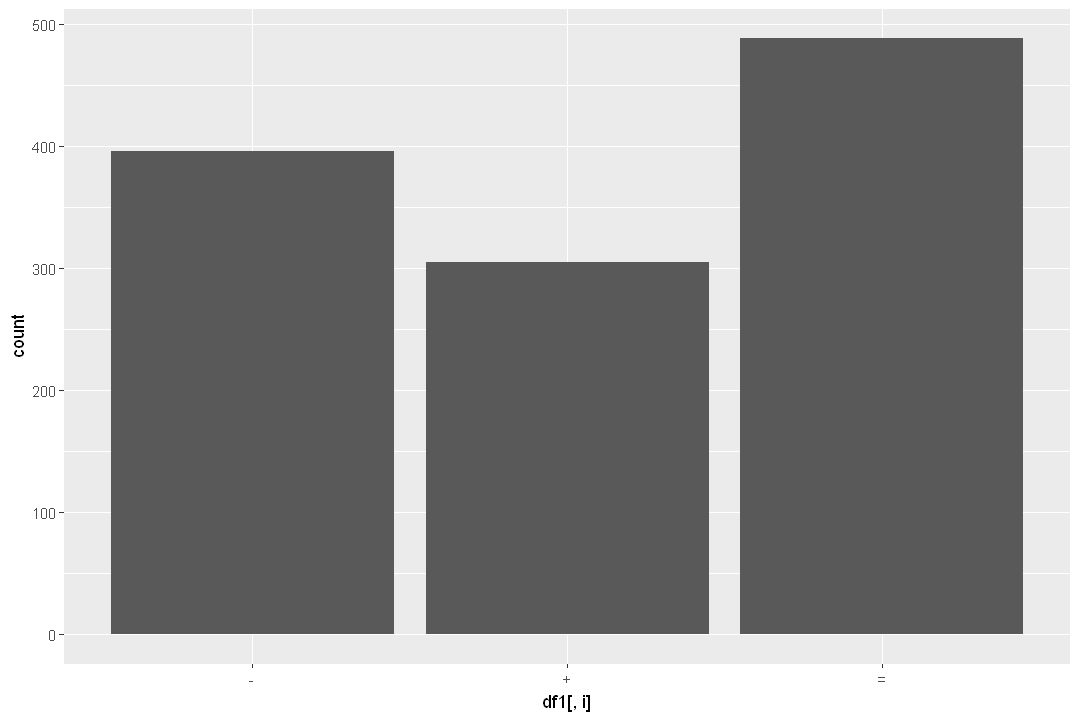

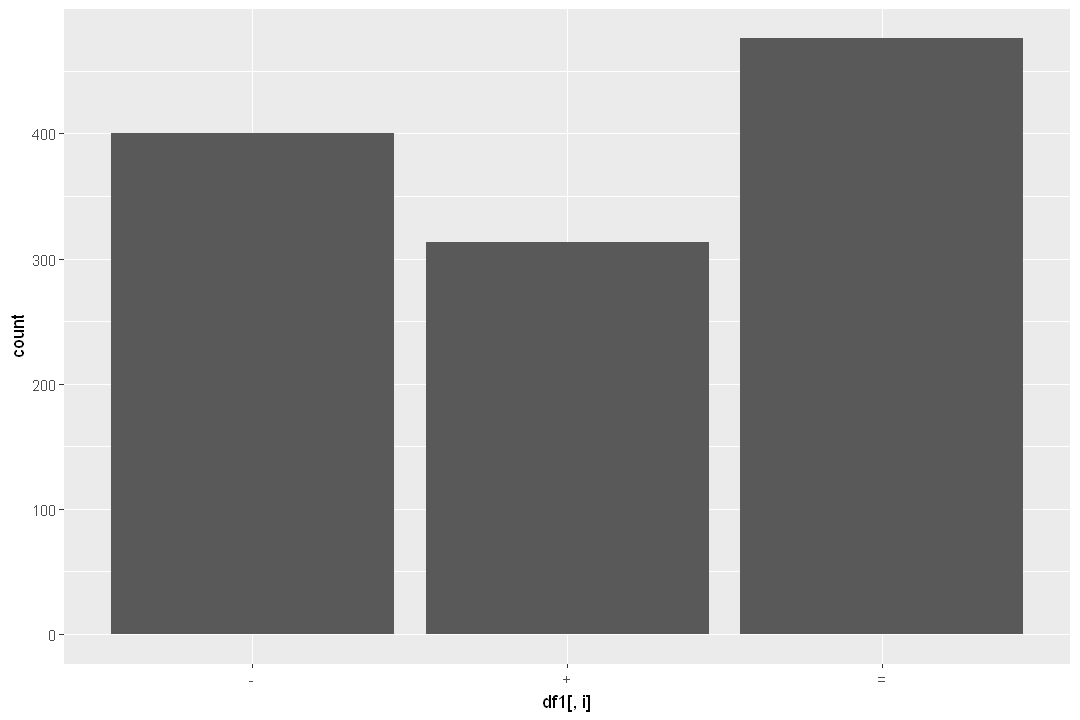

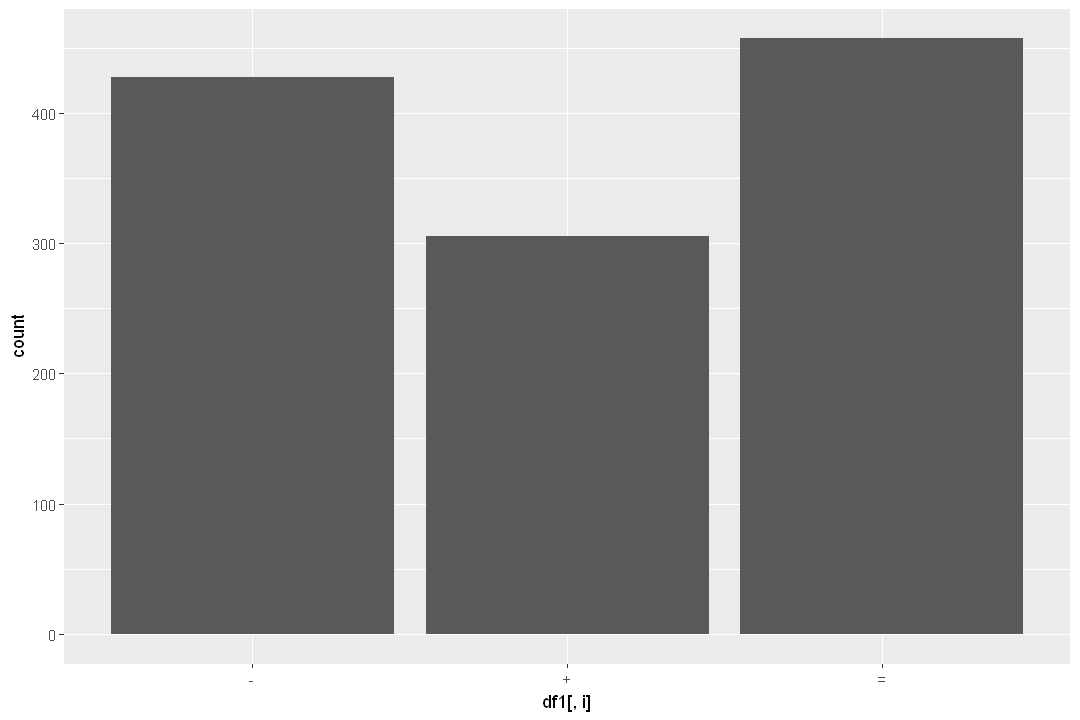

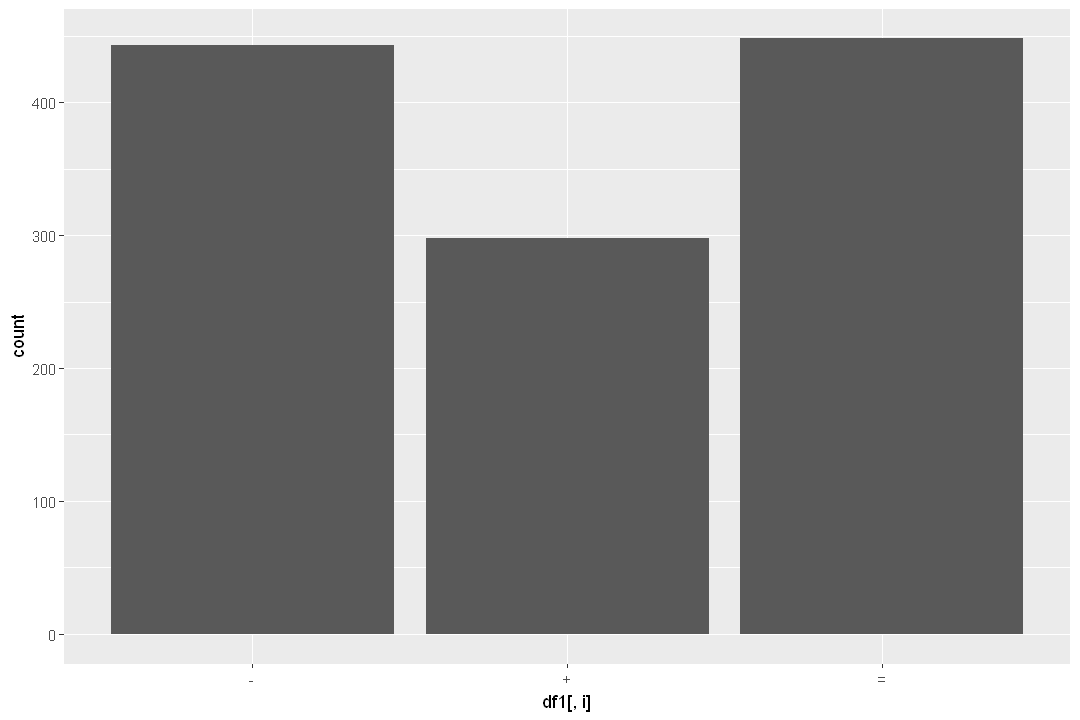

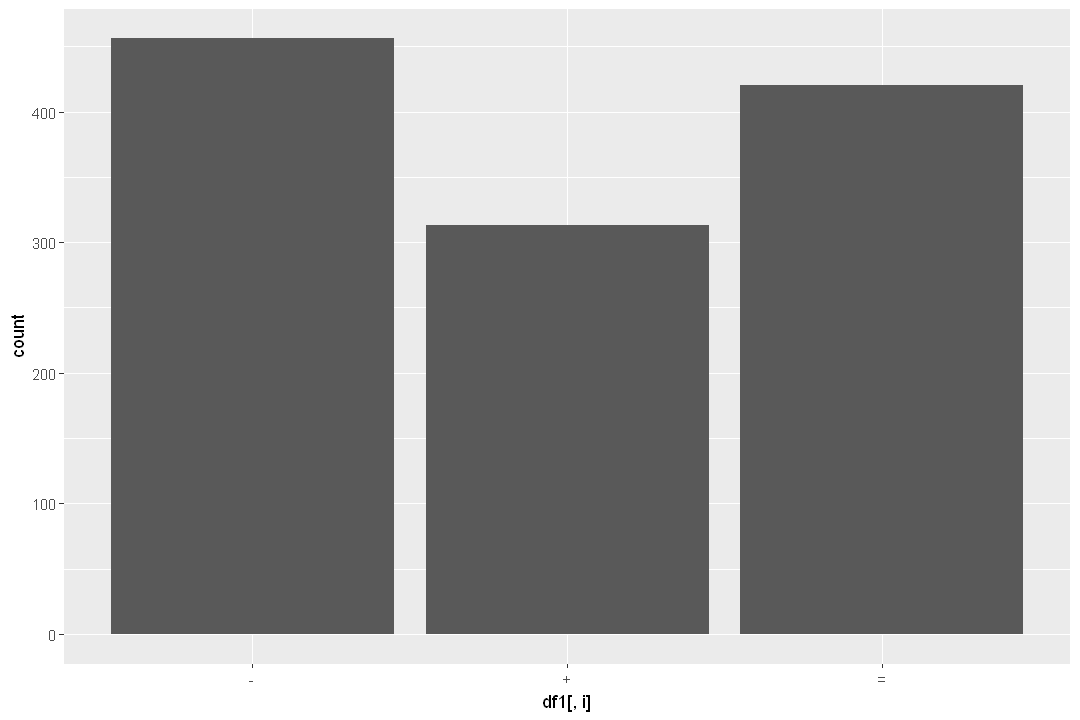

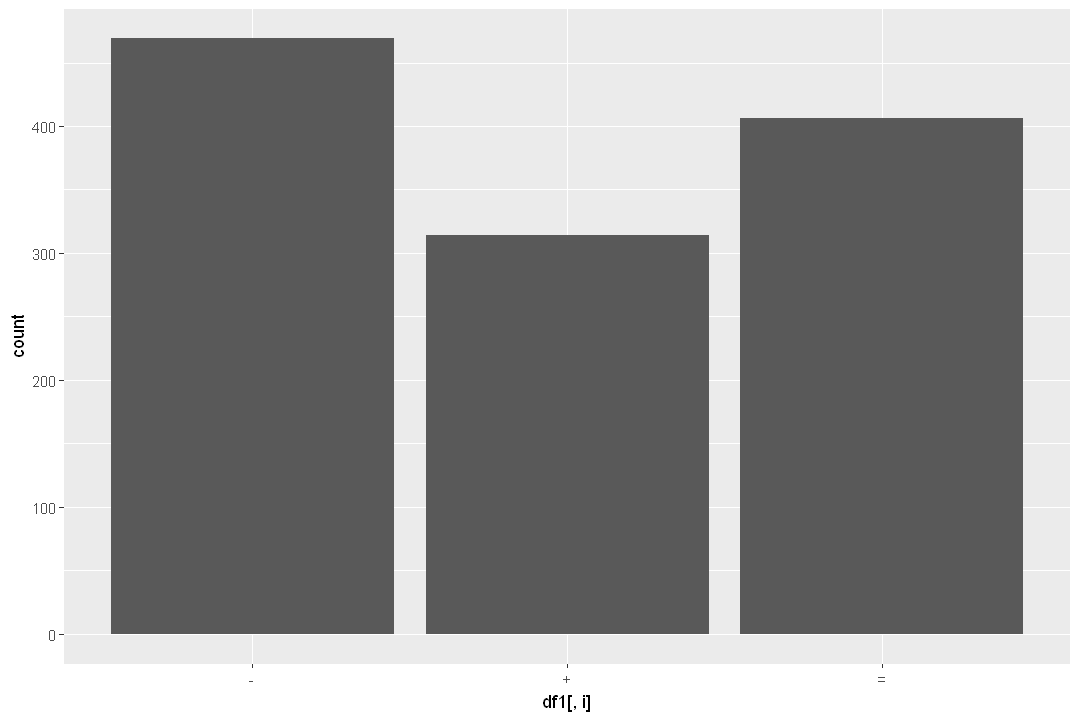

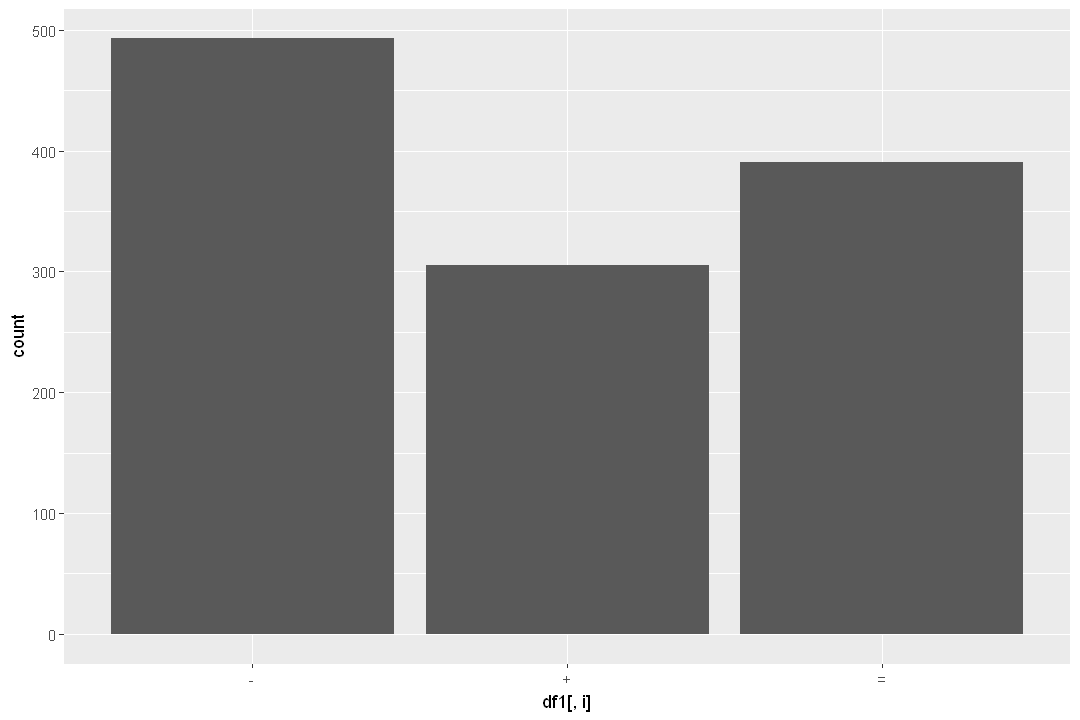

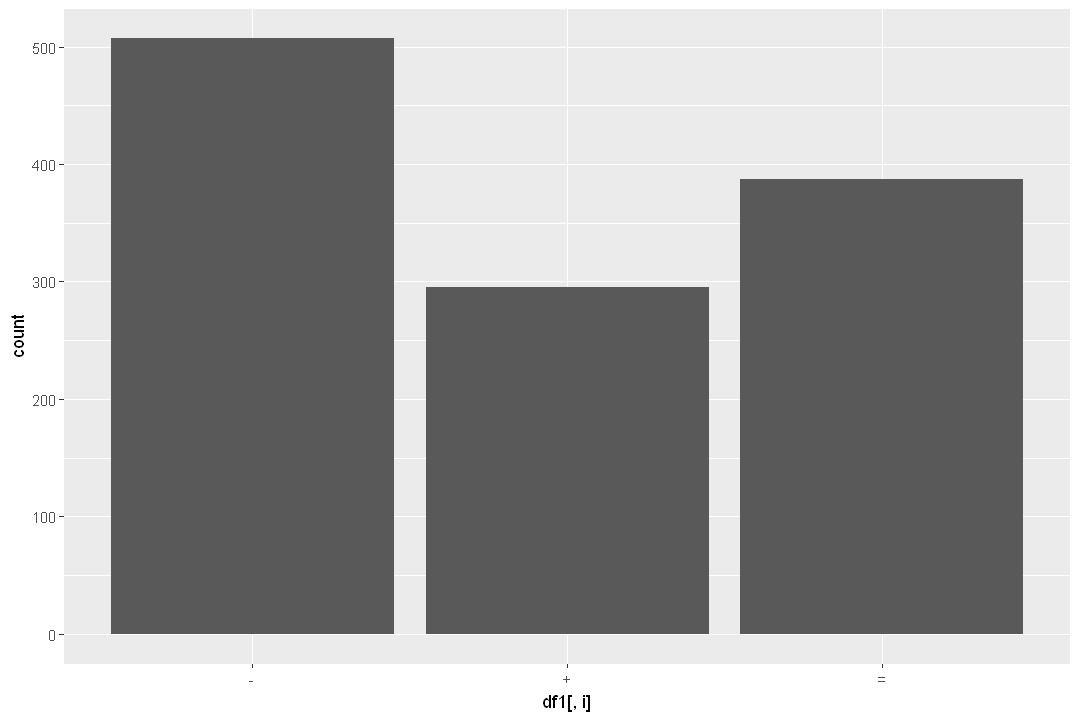

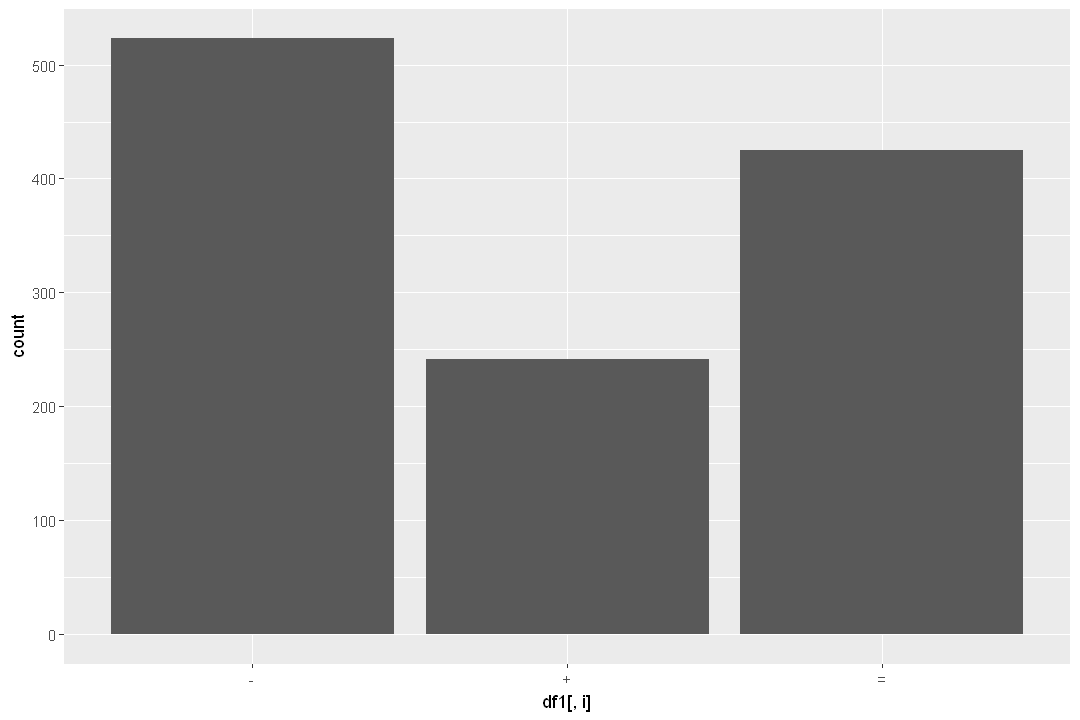

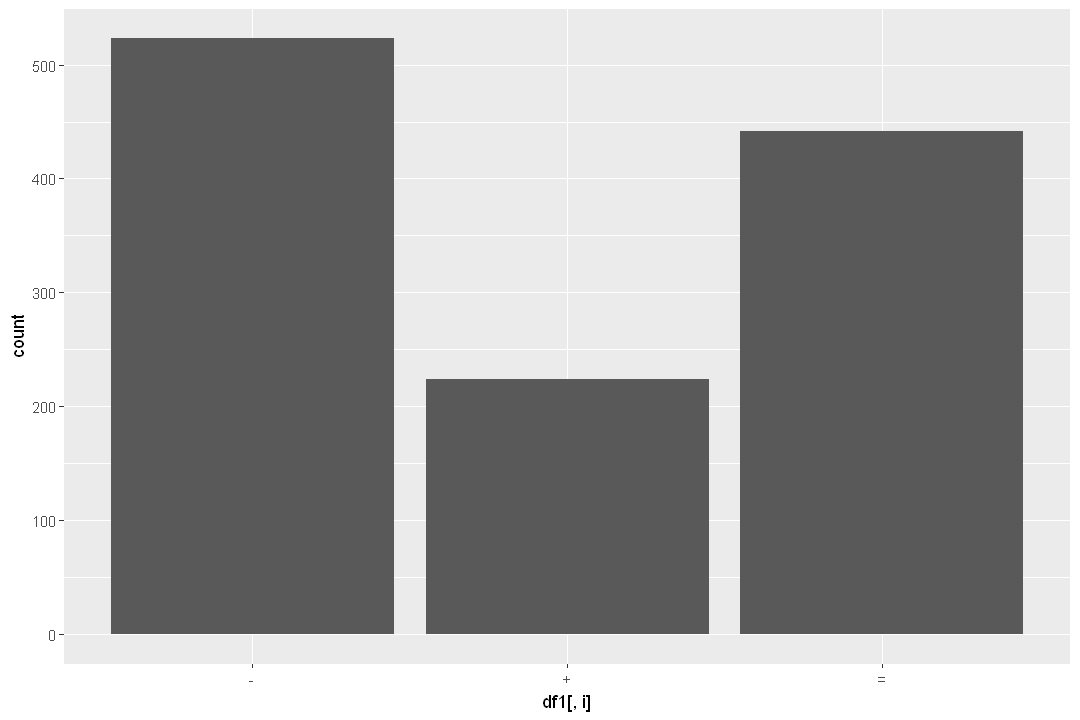

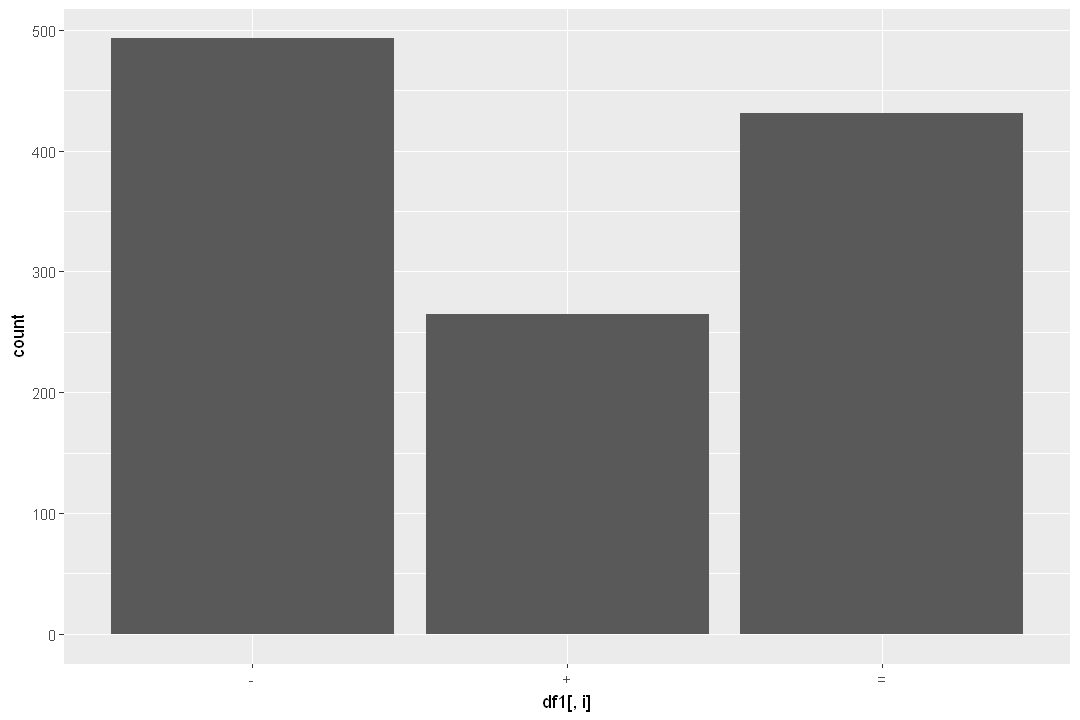

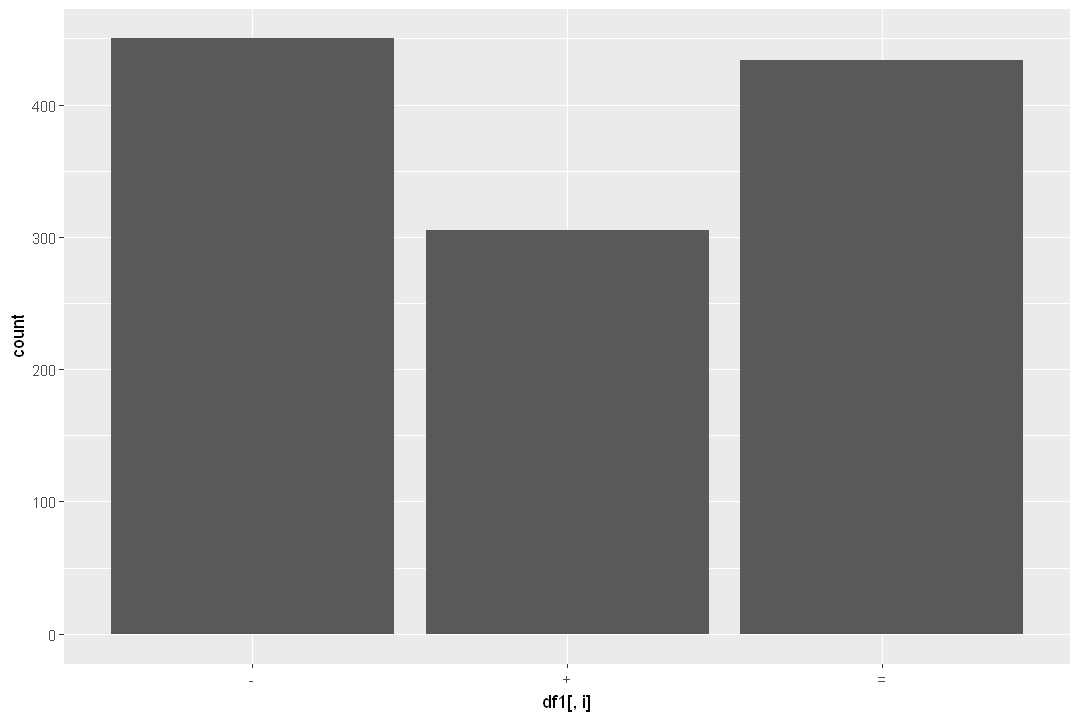

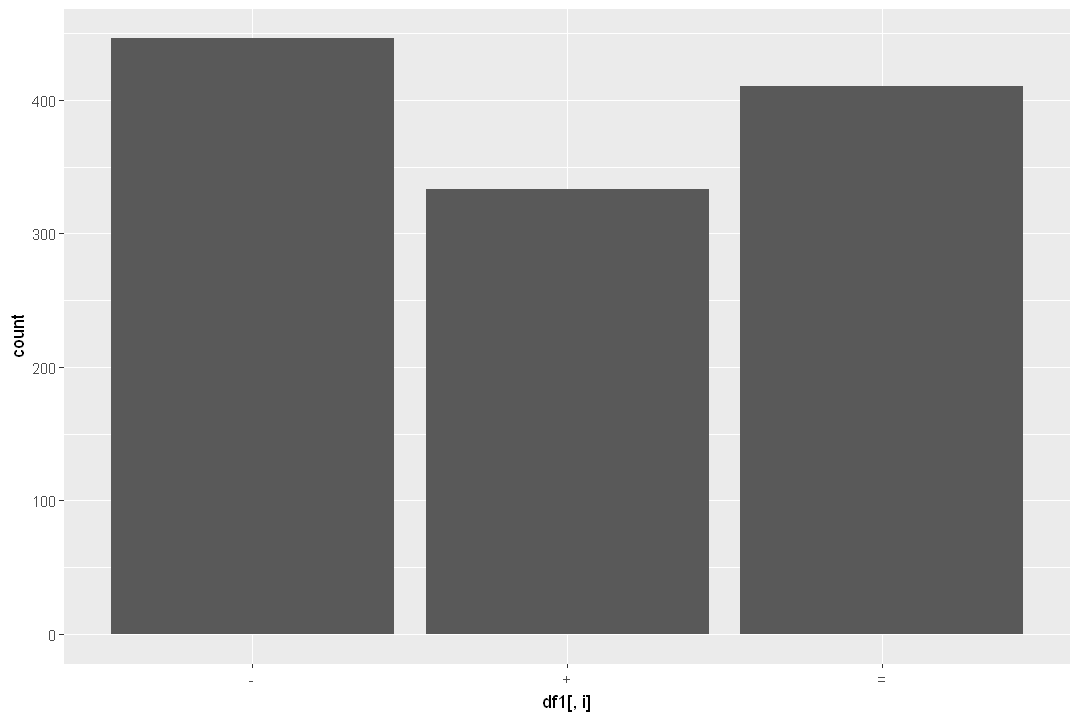

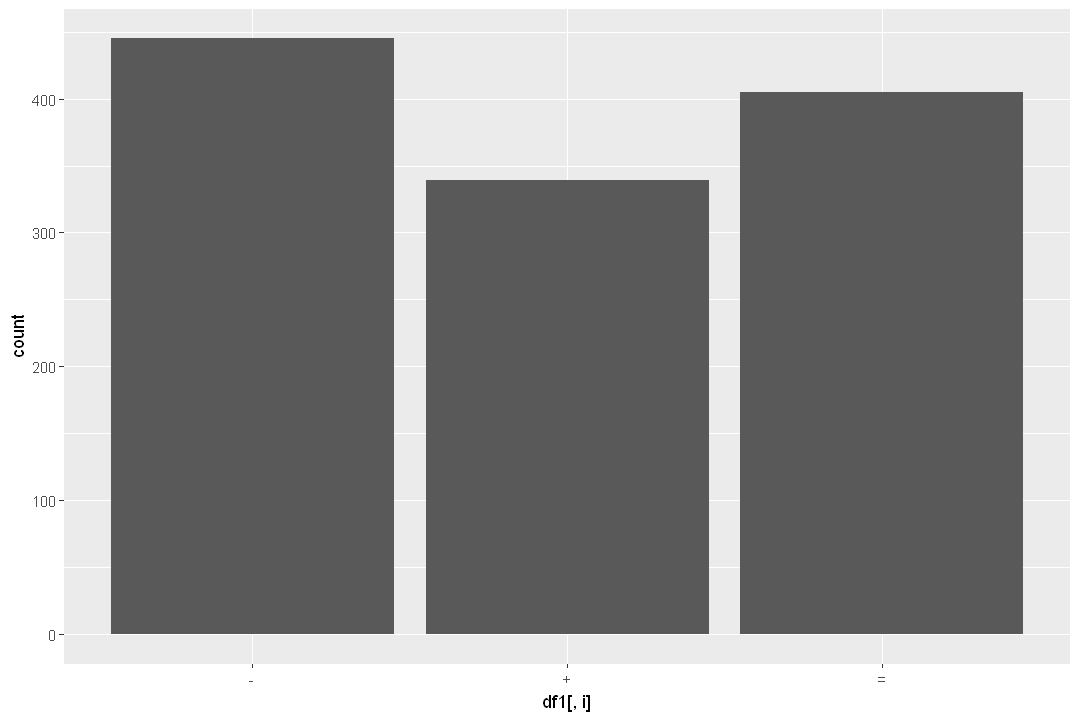

In [46]:
for (i in 1:24) {
    print(ggplot(data = df1, aes(x=df1[,i])) + geom_bar())
}

,eigenvalue,percentage of variance,cumulative percentage of variance
dim 1,0.52650170,26.862331,26.86233
dim 2,0.31739041,16.193388,43.05572
dim 3,0.24584723,12.543226,55.59895
dim 4,0.22386765,11.421819,67.02076
dim 5,0.10877142,5.549562,72.57033
dim 6,0.07411333,3.781292,76.35162


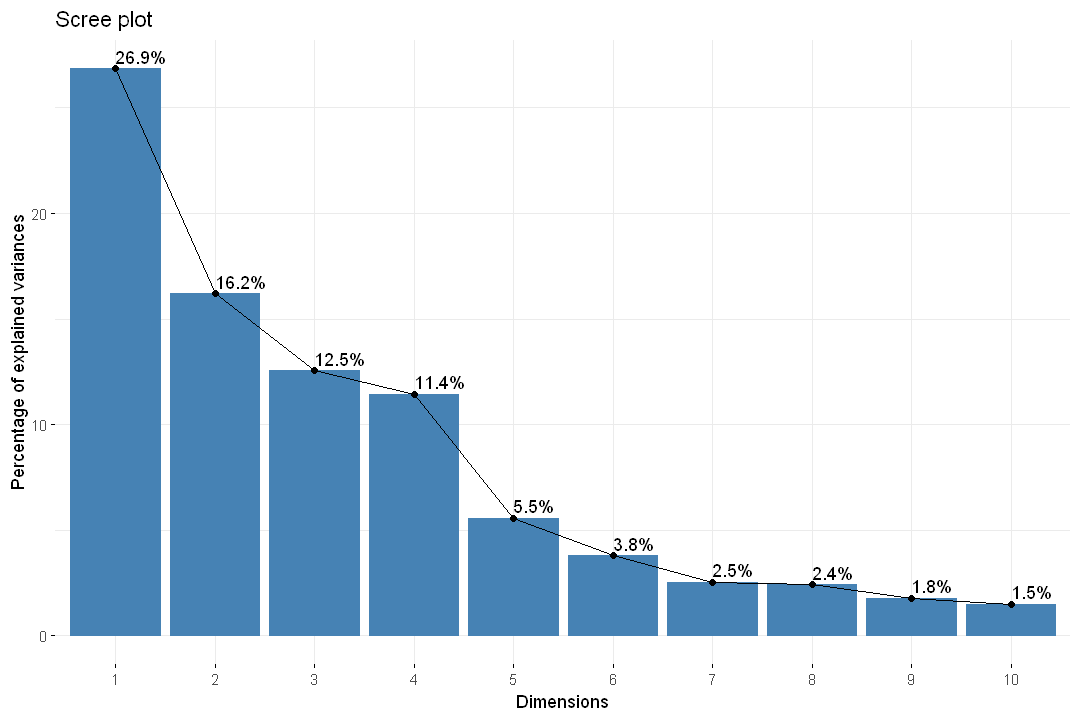

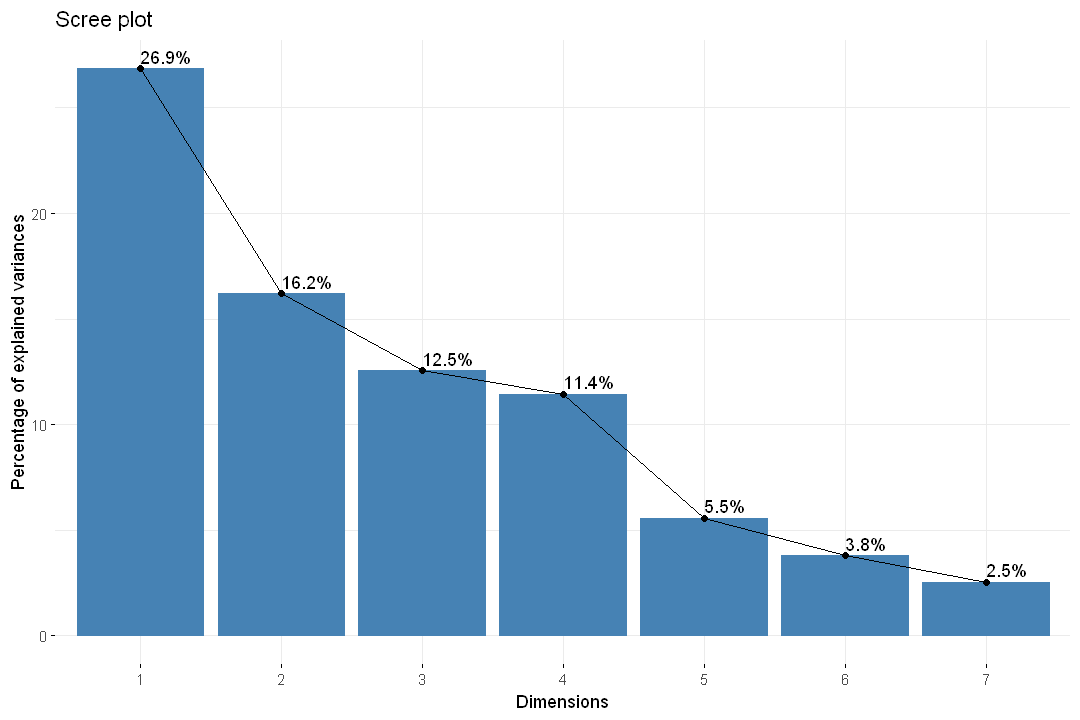

In [47]:
res.mca1 = MCA(df1[c((1:24),26)], graph=FALSE)
head(res.mca1$eig)

fviz_screeplot(res.mca1, addlabels=TRUE)
fviz_screeplot(res.mca1, addlabels=TRUE, ncp=7)

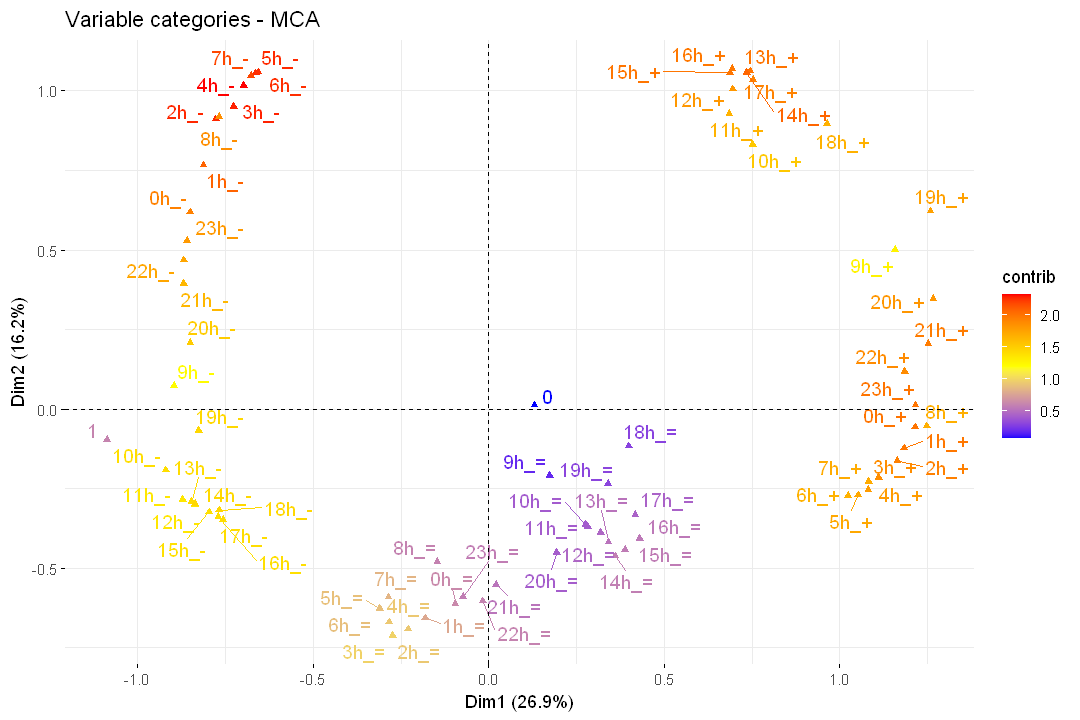

In [51]:
fviz_mca_var(res.mca1, col.var = "contrib",
             gradient.cols = c("blue", "yellow", "red"), axes=c(1,2),
             repel = TRUE)

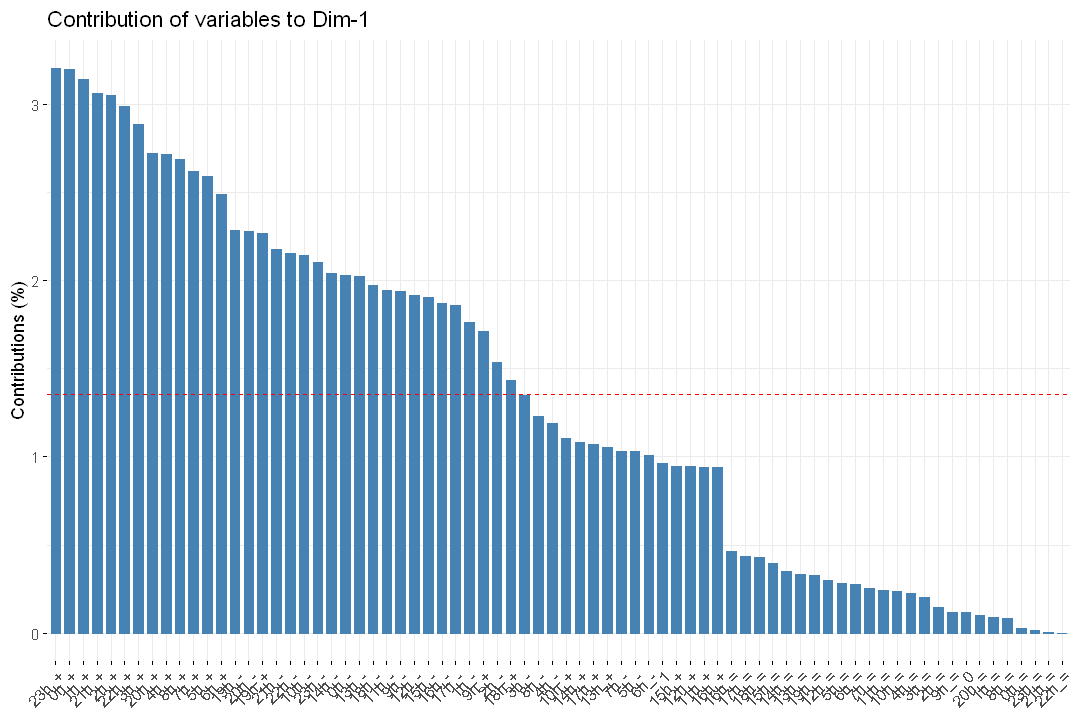

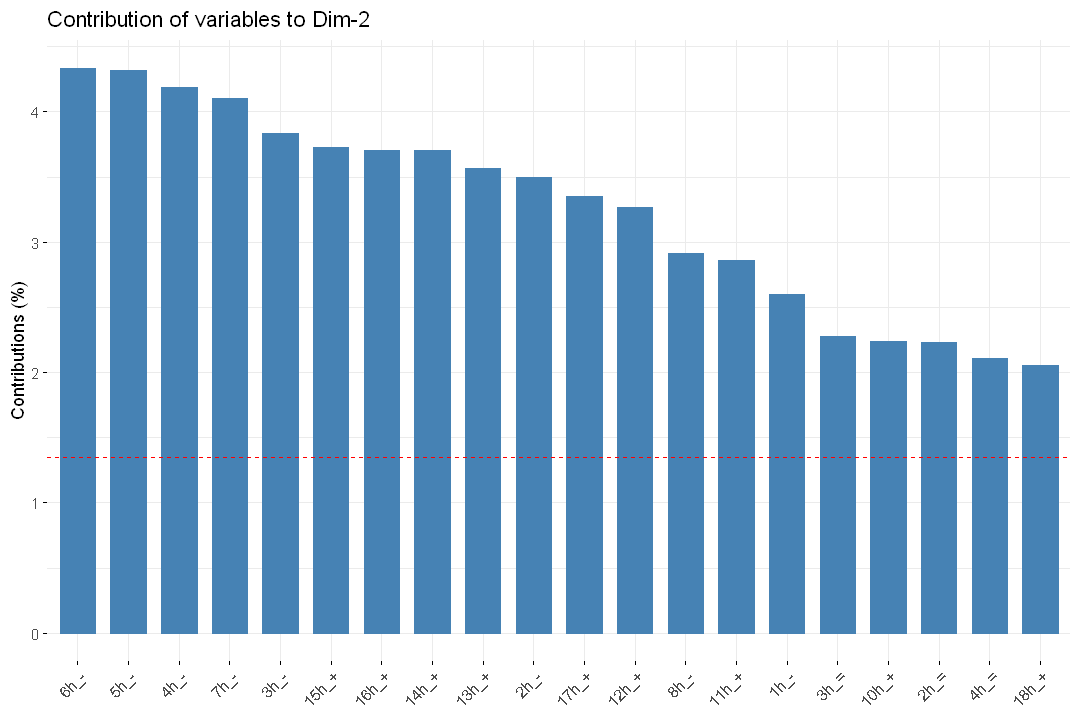

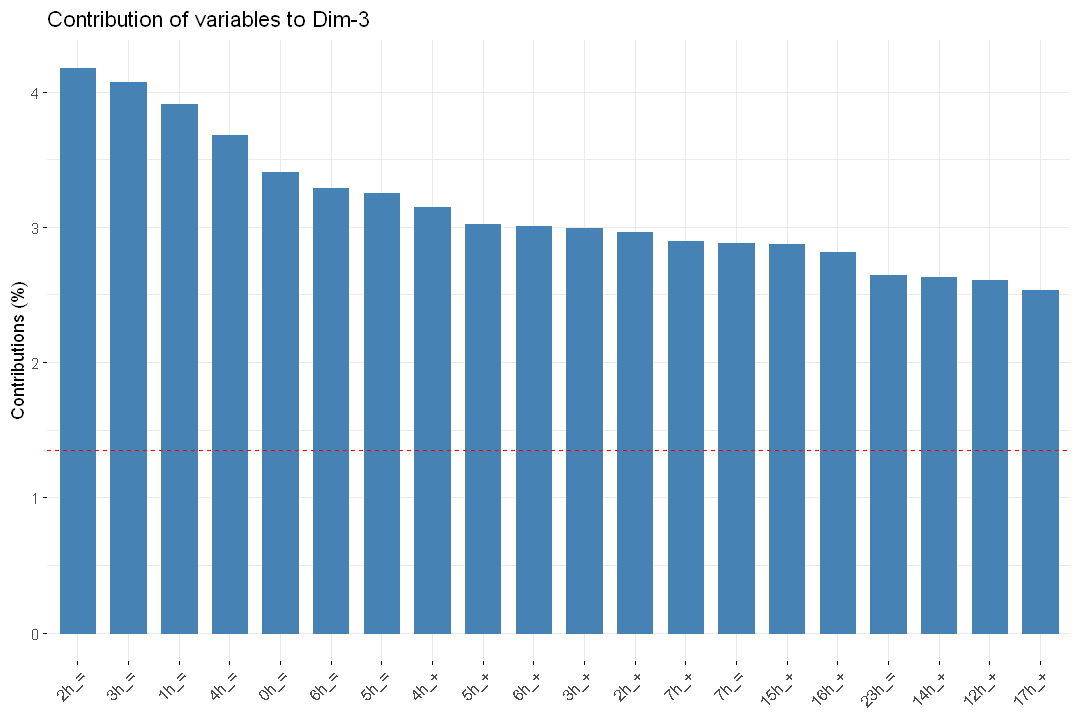

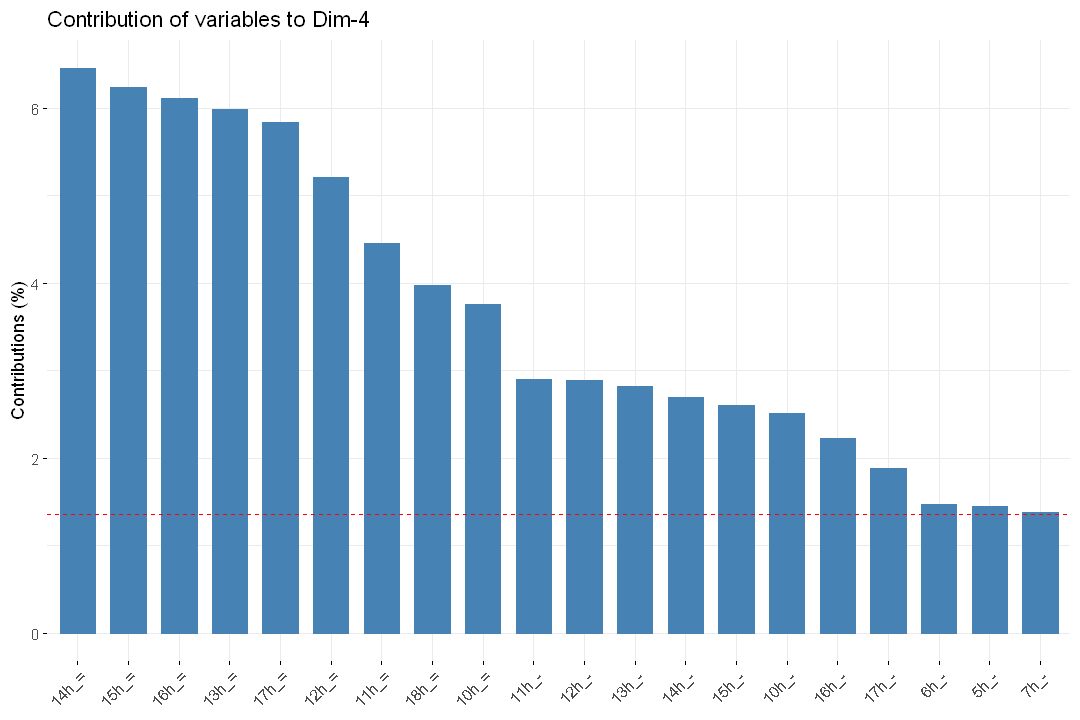

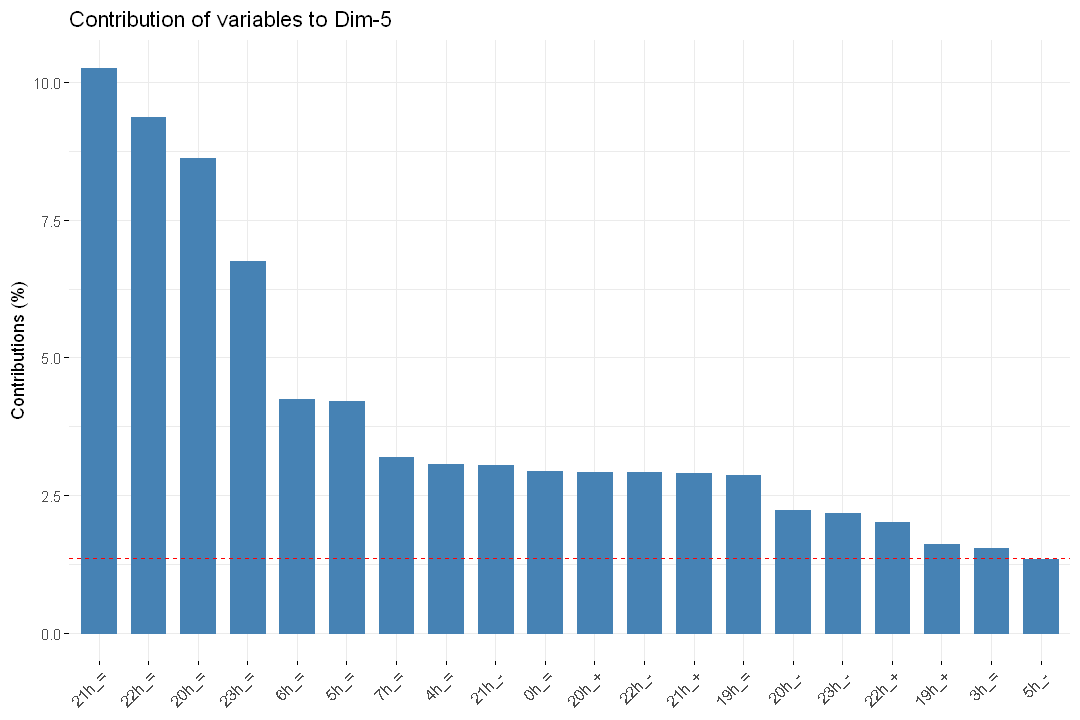

In [52]:
fviz_contrib(res.mca1, choice="var", axes=1, top=80)

# Contributions of hobbies to dimension 2
fviz_contrib(res.mca1, choice="var", axes=2, top=20)


# Contributions of hobbies to dimension 2
fviz_contrib(res.mca1, choice="var", axes=3, top=20)


# Contributions of hobbies to dimension 2
fviz_contrib(res.mca1, choice="var", axes=4, top=20)


fviz_contrib(res.mca1, choice="var", axes=5, top=20)

In [53]:
lundi <- rowMeans(loading[,c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24)])
mardi <- rowMeans(loading[,c(25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48)])
mercredi <- rowMeans(loading[,c(49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72)])
jeudi <- rowMeans(loading[,c(73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96)])
vendredi <- rowMeans(loading[,c(97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120)])
samedi <- rowMeans(loading[,c(121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144)])
dimanche <- rowMeans(loading[,c(145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168)])

df2 <- data.frame(lundi,mardi,mercredi,jeudi,vendredi,samedi,dimanche)

colnames(df2) <- list("Lundi","Mardi","Mercredi","Jeudi","Vendredi","Samedi","Dimanche")
remplacer_valeurs <- function(valeur) {
  ifelse(valeur >= 0 & valeur <= 0.2, "-", 
         ifelse(valeur > 0.2 & valeur <= 0.6, "=","+"))
}
df2 <- as.data.frame(sapply(df2, remplacer_valeurs))
df2$Station <- velib$names
df2$Hill <- as.factor(coord$bonus)
df2$Station <- as.factor(df2$Station)
df2[] <- lapply(df2, as.factor)
head(df2)

,Lundi,Mardi,Mercredi,Jeudi,Vendredi,Samedi,Dimanche,Station,Hill
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,-,=,=,=,=,=,-,EURYALE DEHAYNIN,0
2,=,=,=,=,=,+,=,LEMERCIER,0
3,=,+,=,=,=,=,=,MEZIERES RENNES,0
4,+,=,=,=,=,=,+,FARMAN,0
5,+,+,=,=,=,=,=,QUAI DE LA RAPEE,0
6,=,=,=,=,=,+,-,CHOISY POINT D'IVRY,0


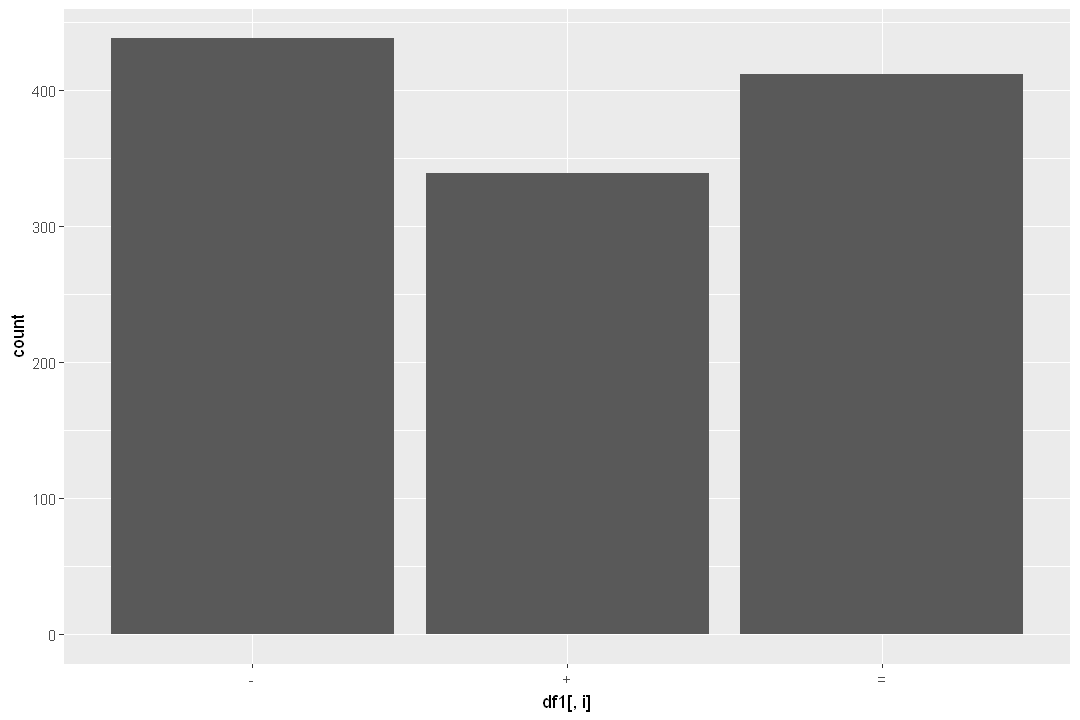

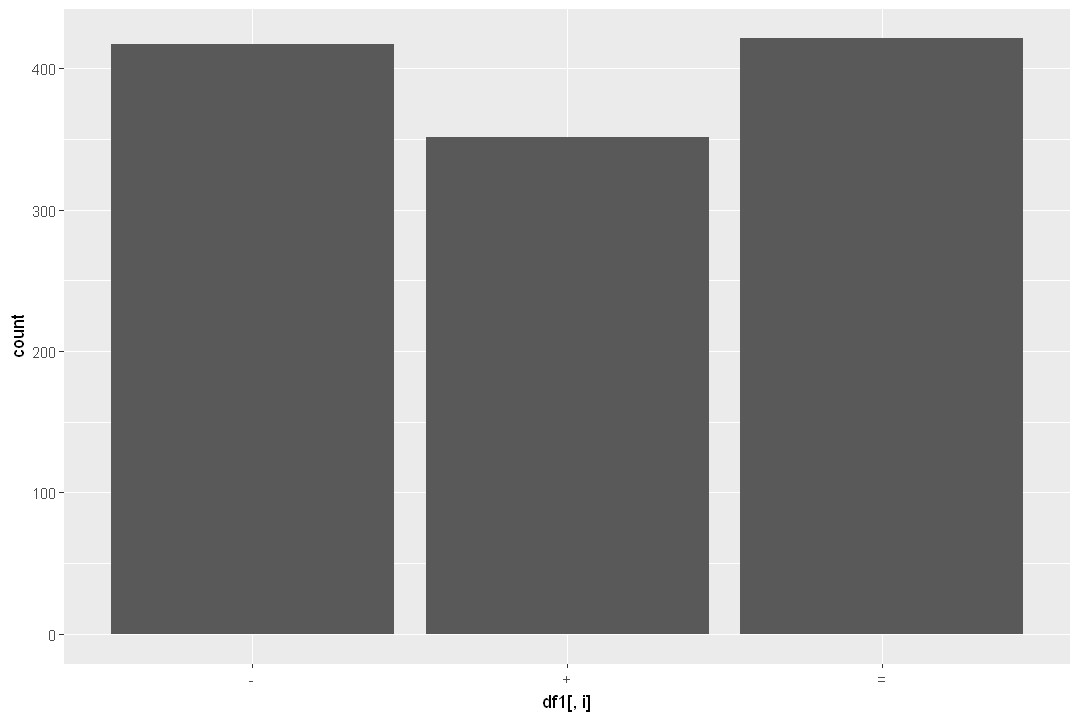

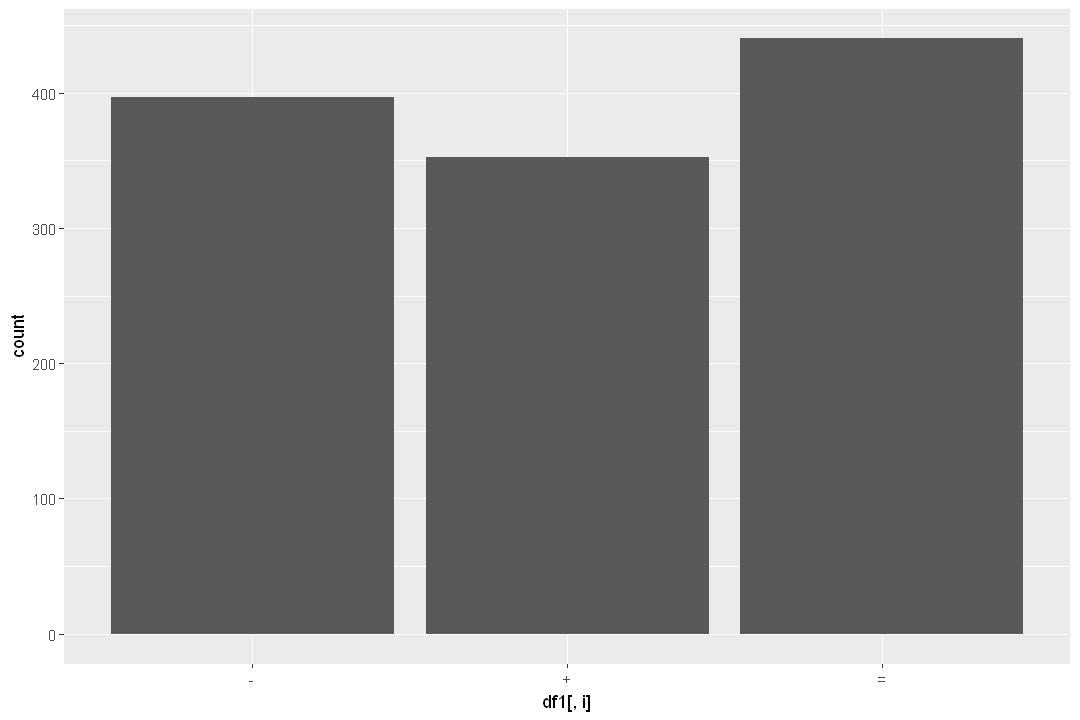

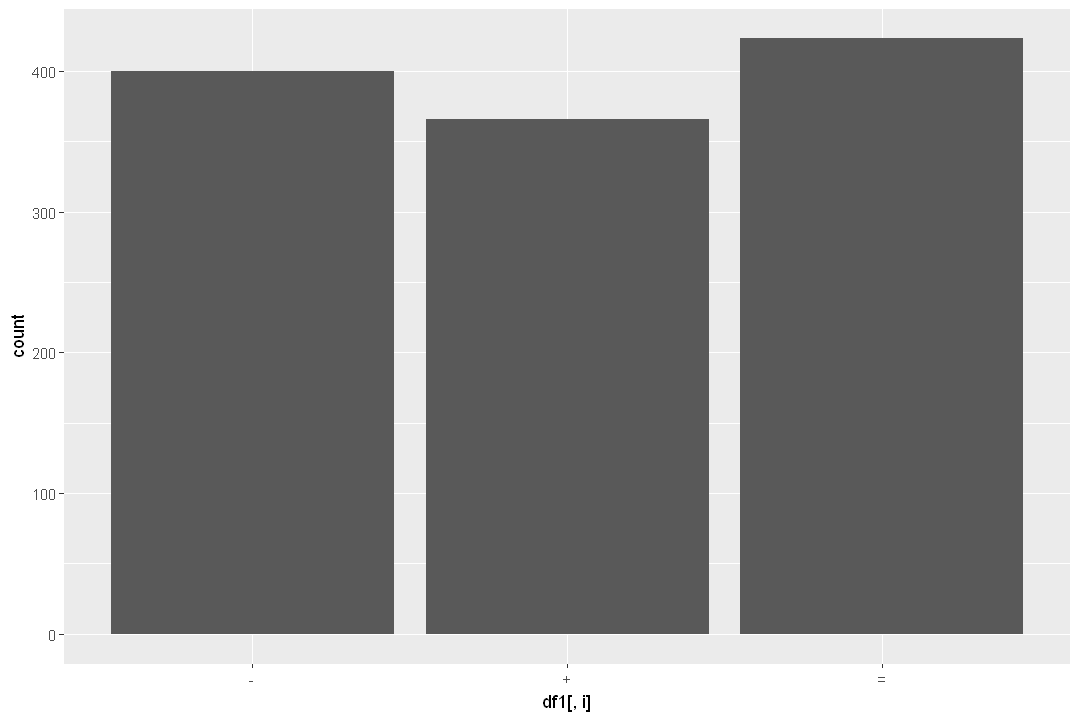

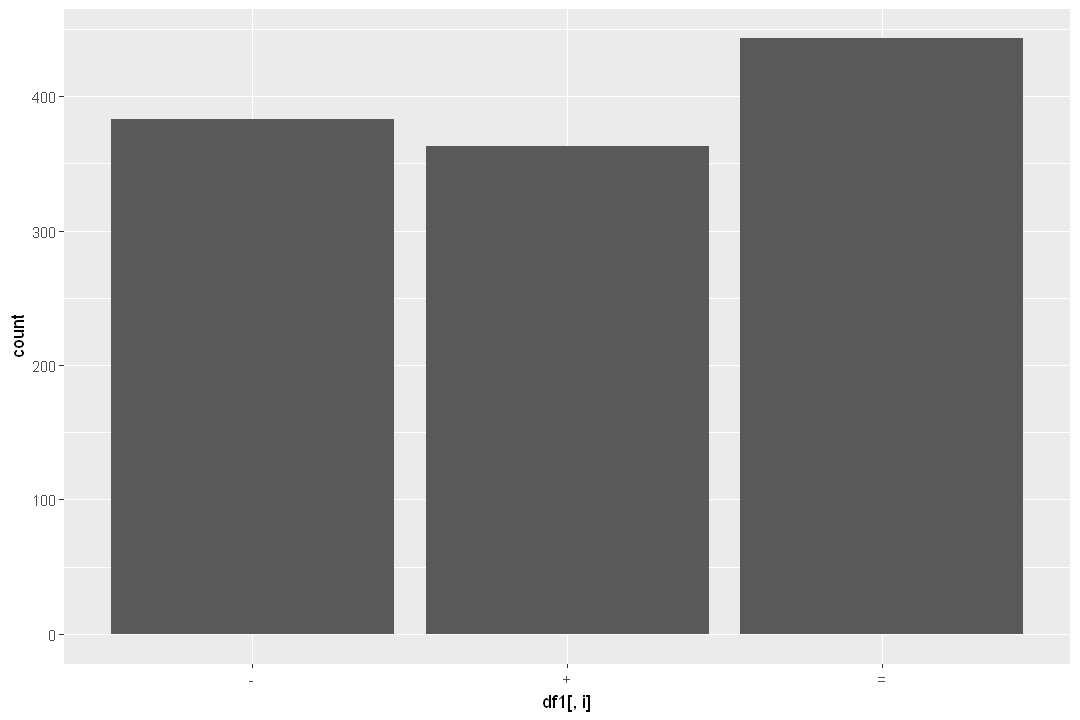

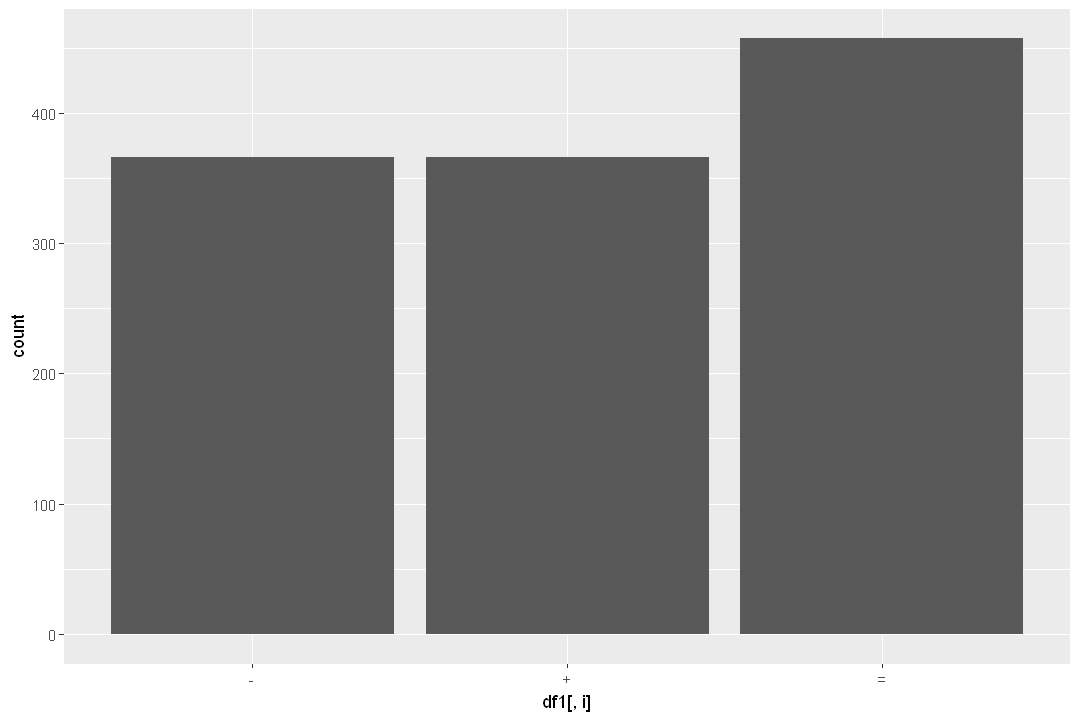

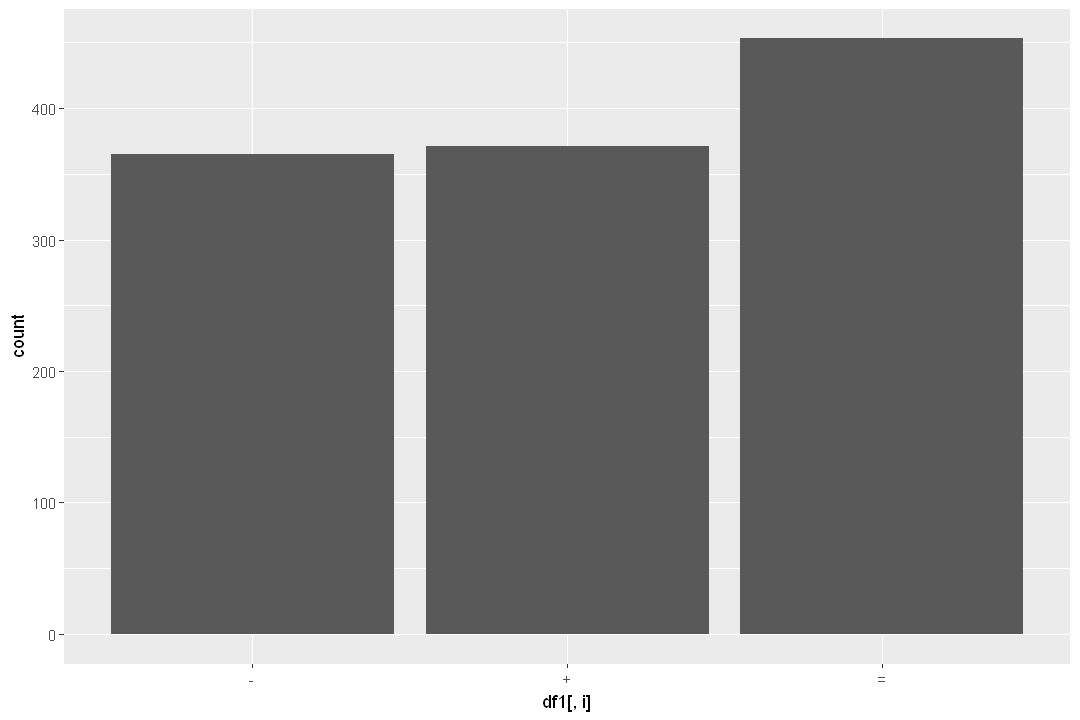

In [54]:
for (i in 1:7) {
    print(ggplot(data = df2, aes(x=df1[,i])) + geom_bar())
}

,eigenvalue,percentage of variance,cumulative percentage of variance
dim 1,0.60075654,32.040349,32.04035
dim 2,0.38514649,20.541146,52.58149
dim 3,0.14757564,7.870701,60.45220
dim 4,0.10123839,5.399381,65.85158
dim 5,0.09826788,5.240954,71.09253
dim 6,0.07965815,4.248435,75.34096


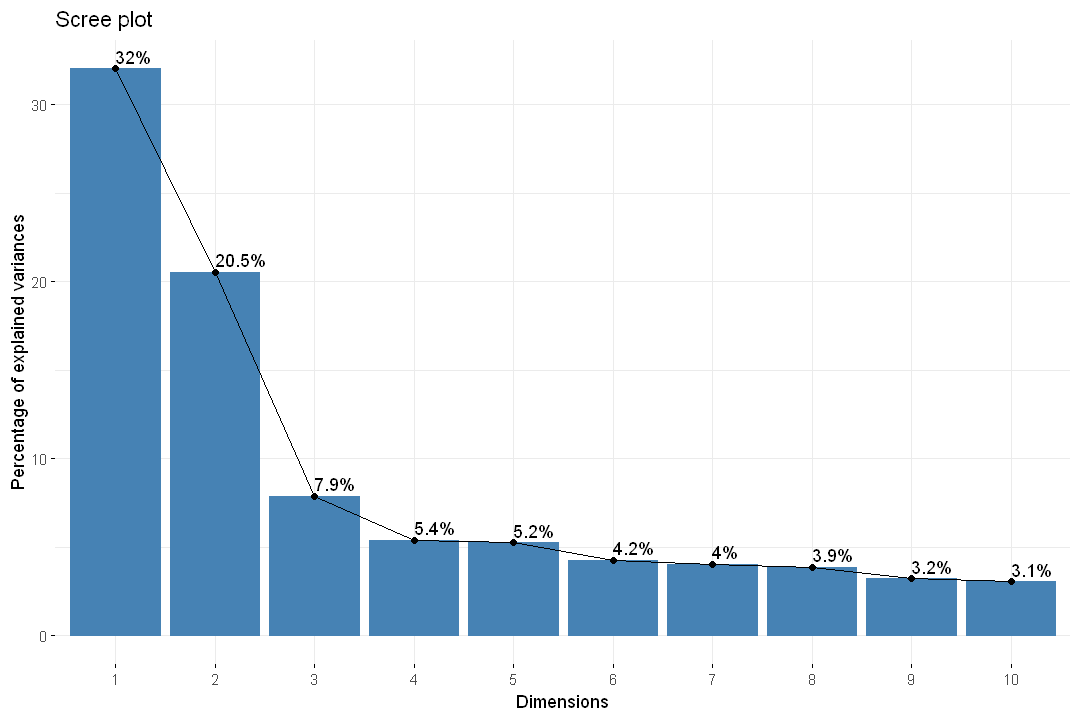

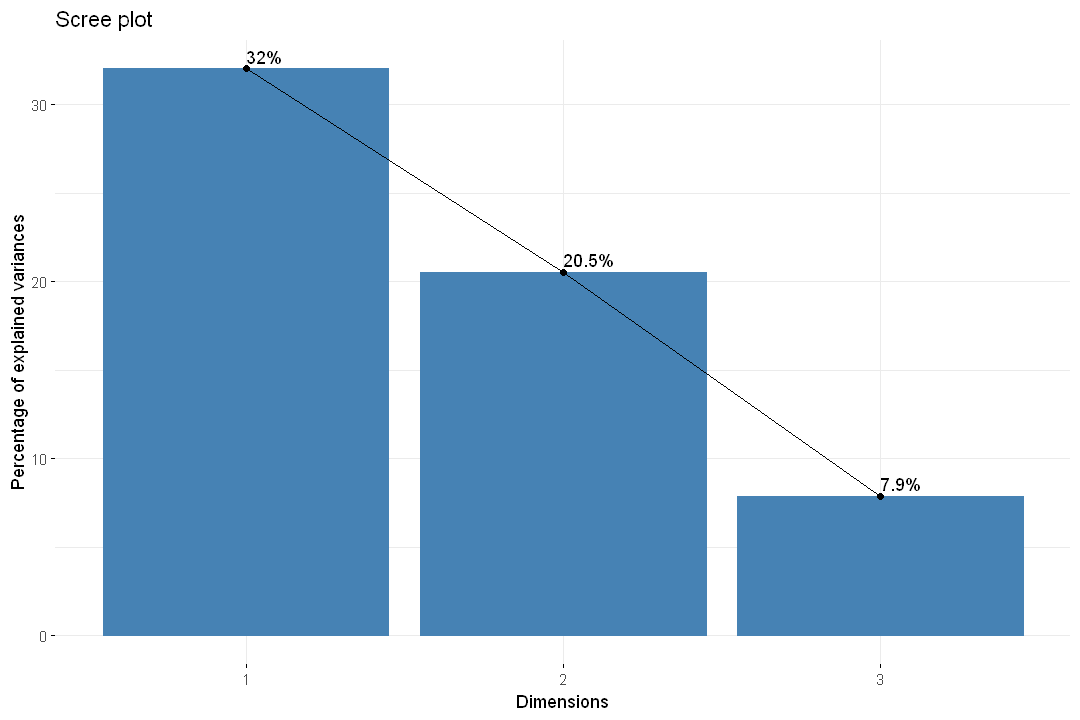

In [55]:
res.mca2 = MCA(df2[c((1:7),9)], graph=FALSE)
head(res.mca2$eig)

fviz_screeplot(res.mca2, addlabels=TRUE)
fviz_screeplot(res.mca2, addlabels=TRUE, ncp=3)

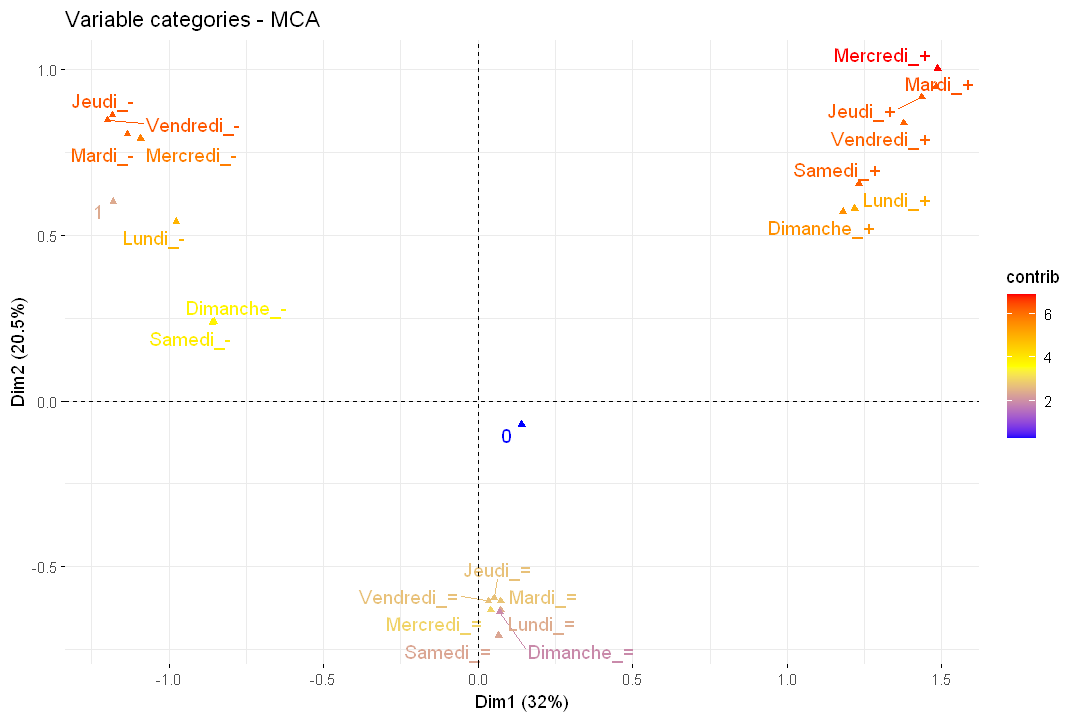

In [56]:
fviz_mca_var(res.mca2, col.var = "contrib",
             gradient.cols = c("blue", "yellow", "red"), axes=c(1,2),
             repel = TRUE)

In [57]:
# Contributions to dimension 1
fviz_contrib(res.mca2, choice="var", axes=1, top=20)

# Contributions of hobbies to dimension 2
fviz_contrib(res.mca2, choice="var", axes=2, top=20)


# Contributions of hobbies to dimension 2
fviz_contrib(res.mca2, choice="var", axes=3, top=20)

ERROR: Error in eval(expr, envir, enclos): objet 'res.mca' introuvable


In [58]:
library(cluster)

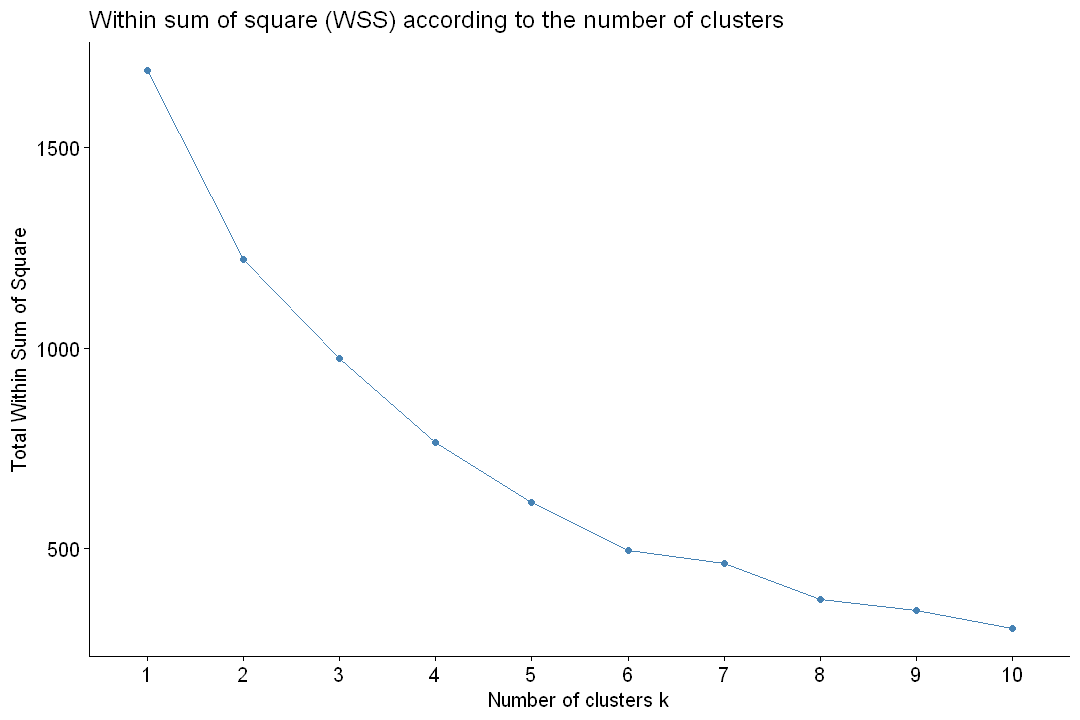

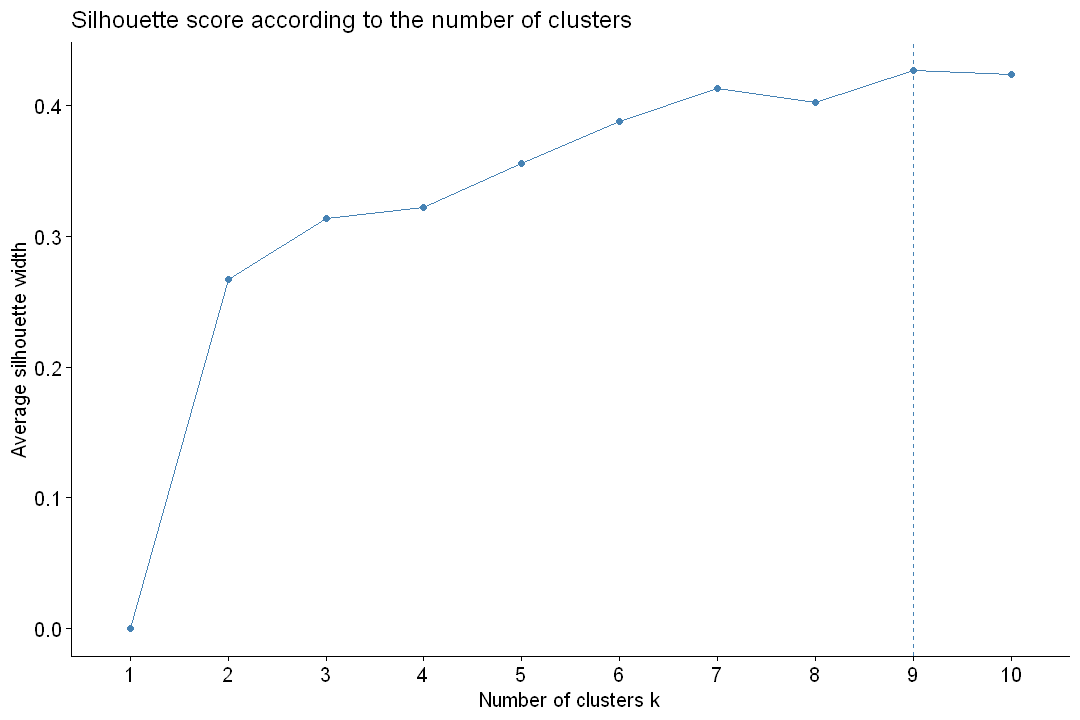

In [59]:
options(repr.plot.width = 9, repr.plot.height = 6)
fviz_nbclust(res.mca1$ind$coord, FUNcluster=kmeans, method="wss") +
    ggtitle("Within sum of square (WSS) according to the number of clusters")

fviz_nbclust(res.mca1$ind$coord, FUNcluster=kmeans, method="silhouette") +
    ggtitle("Silhouette score according to the number of clusters")

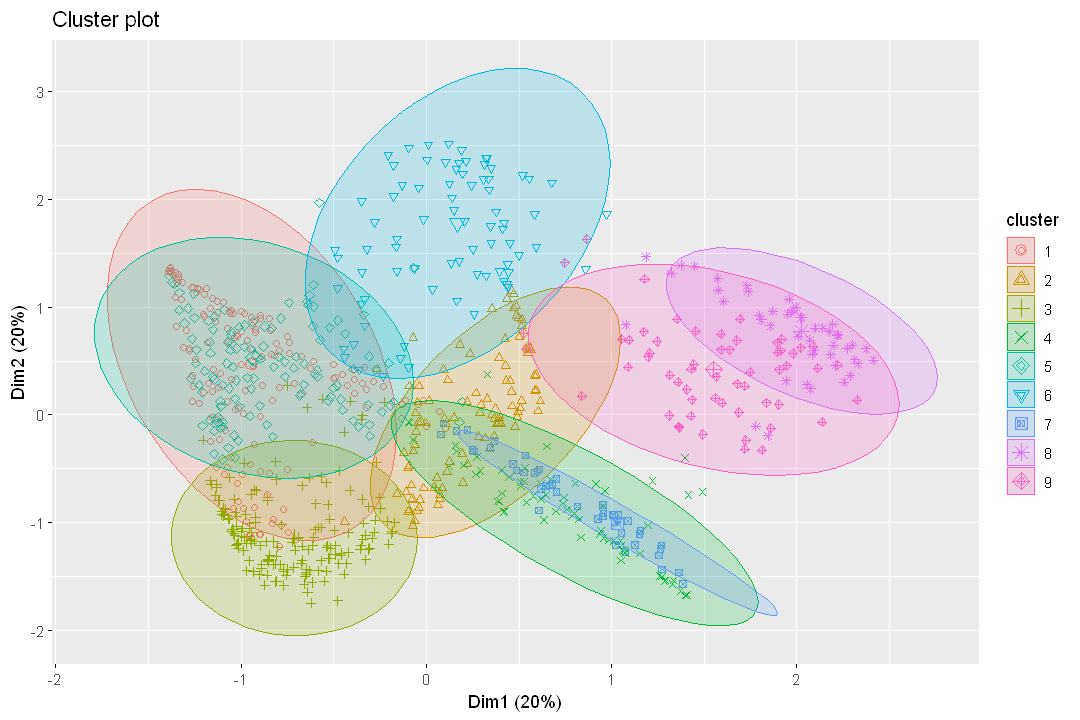

In [60]:
reskmeans = kmeans(res.mca1$ind$coord, centers=9) 

fviz_cluster(reskmeans, data=res.mca1$ind$coord, ellipse.type="norm", labelsize=8, geom=c("point"))

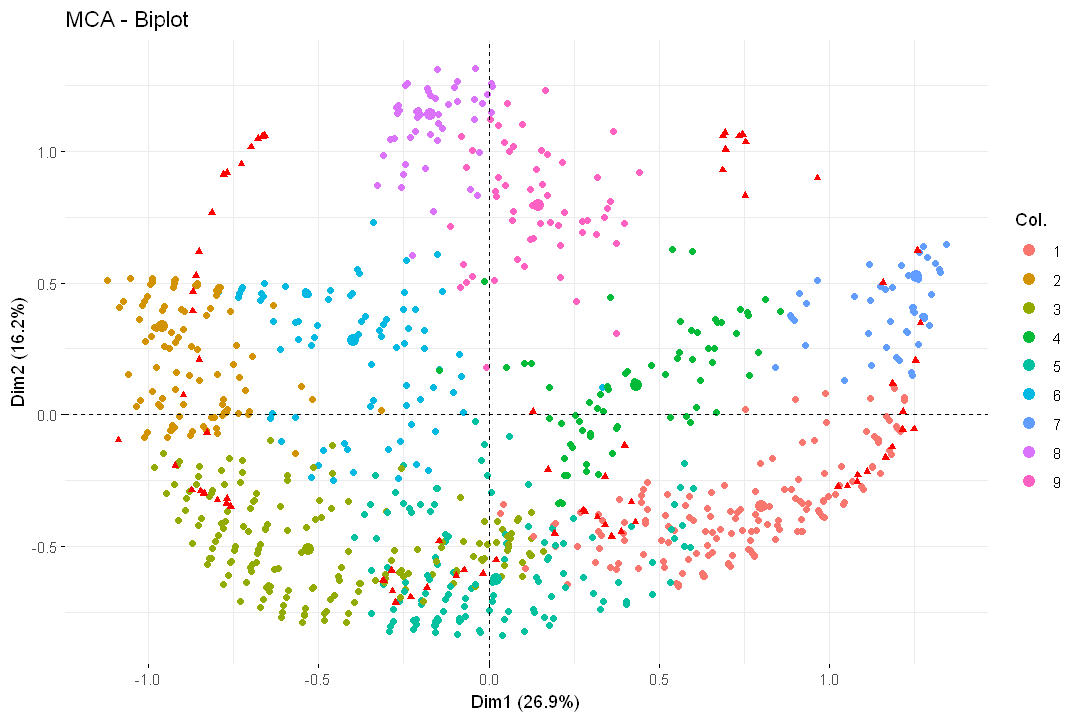

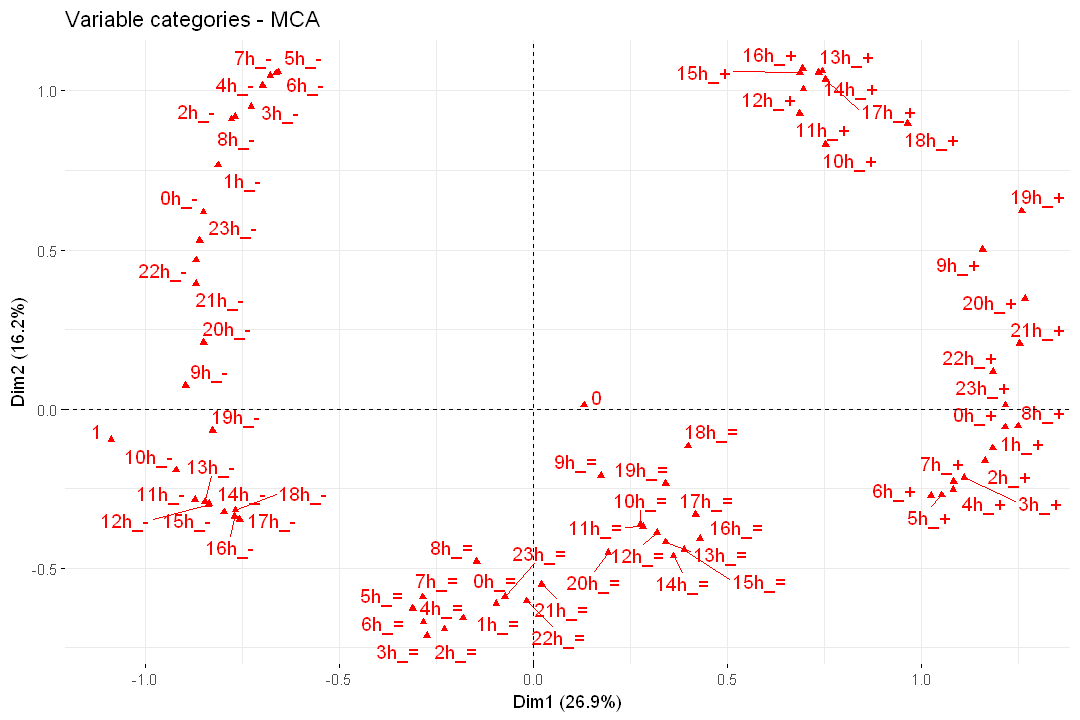

In [61]:
options(repr.plot.width = 9, repr.plot.height = 6)
fviz_mca_biplot(res.mca1, col.ind = as.factor(reskmeans$cluster), geom = c("point"))
fviz_mca_var(res.mca1, repel = TRUE)

In [62]:
cluster_palette <- colorFactor(c("#FF0000", "#0000FF", "#00FF00", "#FFFF00","#000000", "#FFFFFF","#FFA500", "#800080", "#FFC0CB", "#808080"), domain = unique(reskmeans$cluster))  # Utiliser la palette viridis avec 10 couleurs

leaflet(velib$position) %>% 
  addTiles(urlTemplate = "https://{s}.basemaps.cartocdn.com/light_all/{z}/{x}/{y}{r}.png", 
           attribution = 'Map tiles by Carto, under CC BY 3.0. Data by OpenStreetMap, under ODbL.') %>% 
  addCircleMarkers(radius = 3,
                   color = ~cluster_palette(reskmeans$cluster),
                   stroke = FALSE, 
                   fillOpacity = 0.9) %>%
addLegend(position = "bottomright", 
            pal = cluster_palette, 
            values = ~reskmeans$cluster,
            title = "Cluster",
            opacity = 1)

HTML widgets cannot be represented in plain text (need html)

In [63]:
library(mclust)

Package 'mclust' version 6.1
Type 'citation("mclust")' for citing this R package in publications.


Attachement du package : 'mclust'


L'objet suivant est masqué depuis 'package:purrr':

    map




Best BIC values:
           EEV,17     EEV,15    EEV,18
BIC      2903.198 2838.87229 2732.4698
BIC diff    0.000  -64.32581 -170.7283

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEV (ellipsoidal, equal volume and shape) model with 17 components: 

 log-likelihood    n  df      BIC      ICL
       2428.759 1189 276 2903.198 2741.974

Clustering table:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17 
144  22  23  52  80  60  21 111  14  63 155  35  38 104  82 105  80 

Warning message:
"`gather_()` was deprecated in tidyr 1.2.0.
ℹ Please use `gather()` instead.
ℹ The deprecated feature was likely used in the factoextra package.
  Please report the issue at <https://github.com/kassambara/factoextra/issues>."


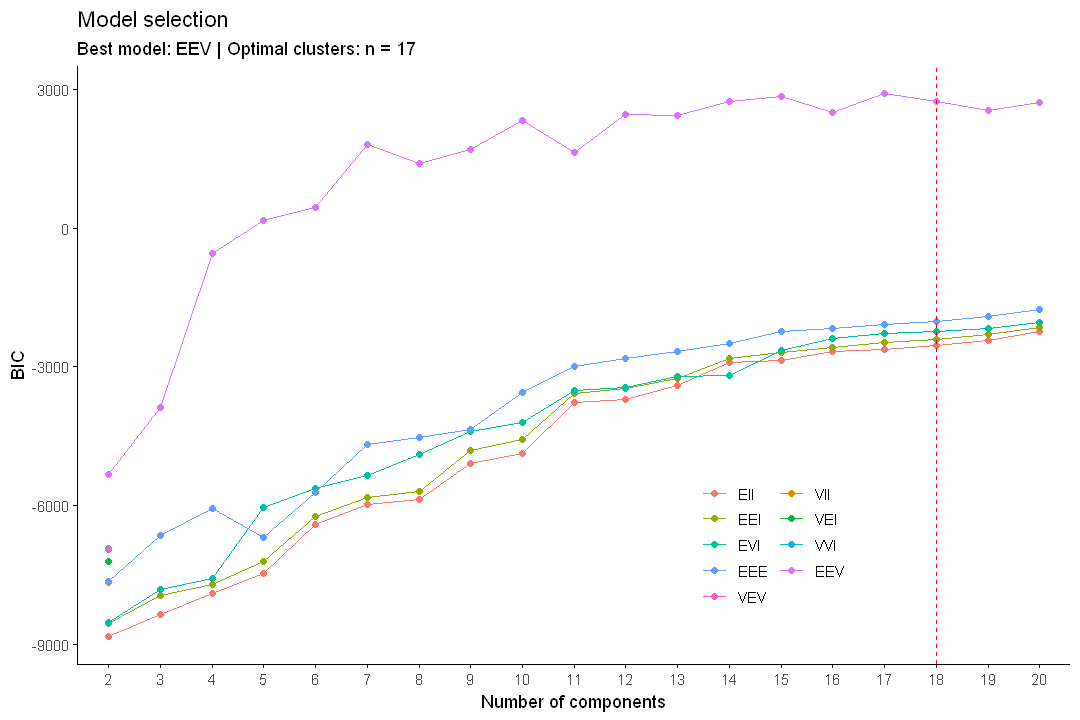

In [64]:
resBICall = mclustBIC(res.mca1$ind$coord, G=2:20)
summary(resBICall)

# --- #

resBICall = Mclust(res.mca1$ind$coord, G=2:20)
summary(resBICall)


fviz_mclust(resBICall, what="BIC")

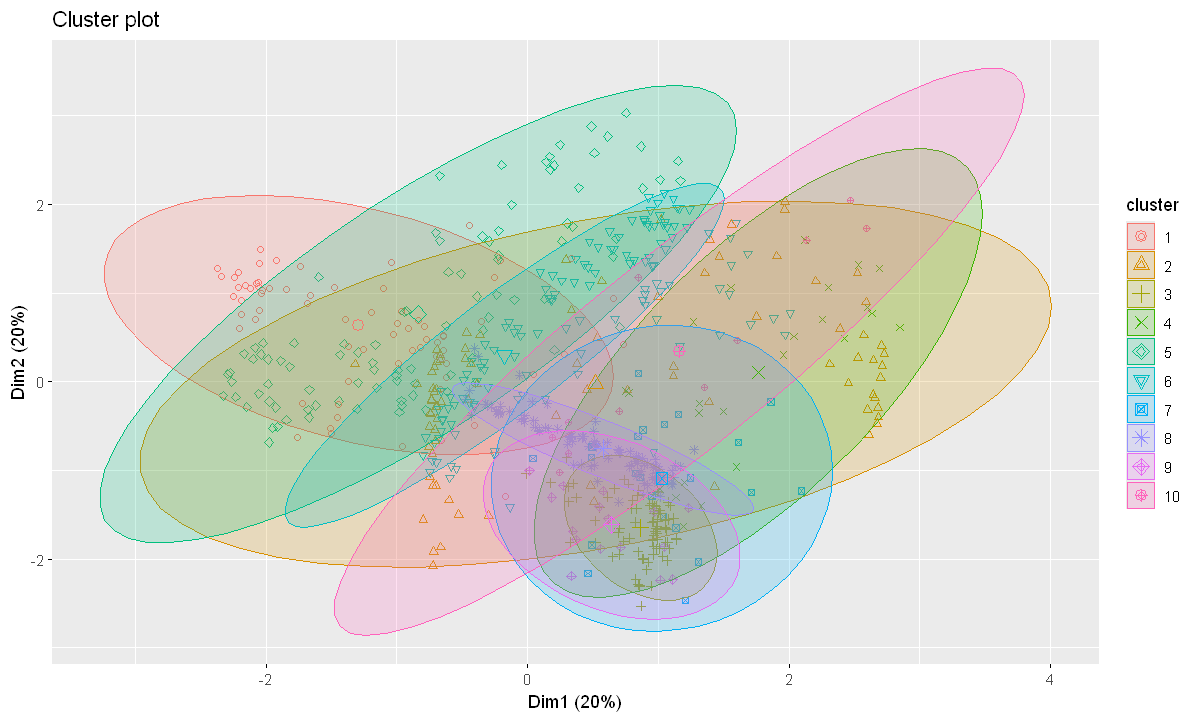

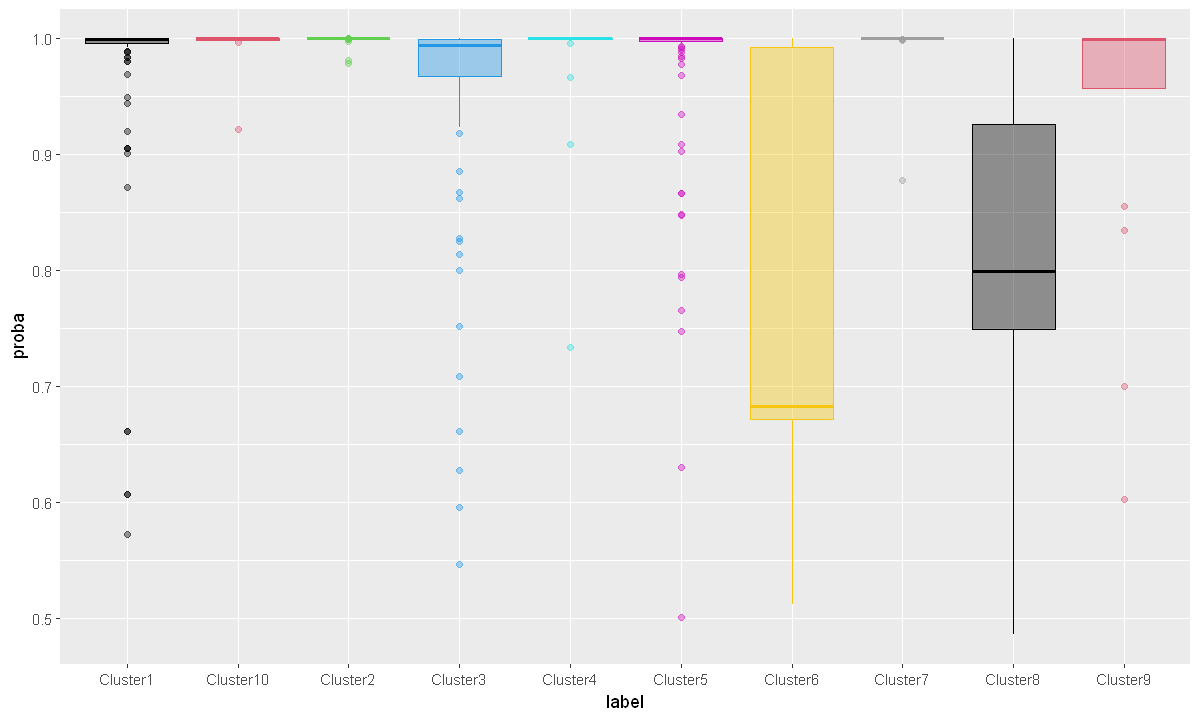

In [74]:
options(repr.plot.width = 10, repr.plot.height = 6)

resBIC = Mclust(res.mca1$ind$coord, G=10, modelNames = "EEV")
fviz_cluster(resBIC, data=res.mca1$ind$coord, ellipse.type="norm", geom="point")

# --- #

aux = data.frame(
    label = paste("Cluster", resBIC$classification, sep=""), 
    proba = apply(resBIC$z, 1, max))

ggplot(aux, aes(x=label, y=proba)) + 
    geom_boxplot(colour=1:10, fill=1:10, alpha=.4)

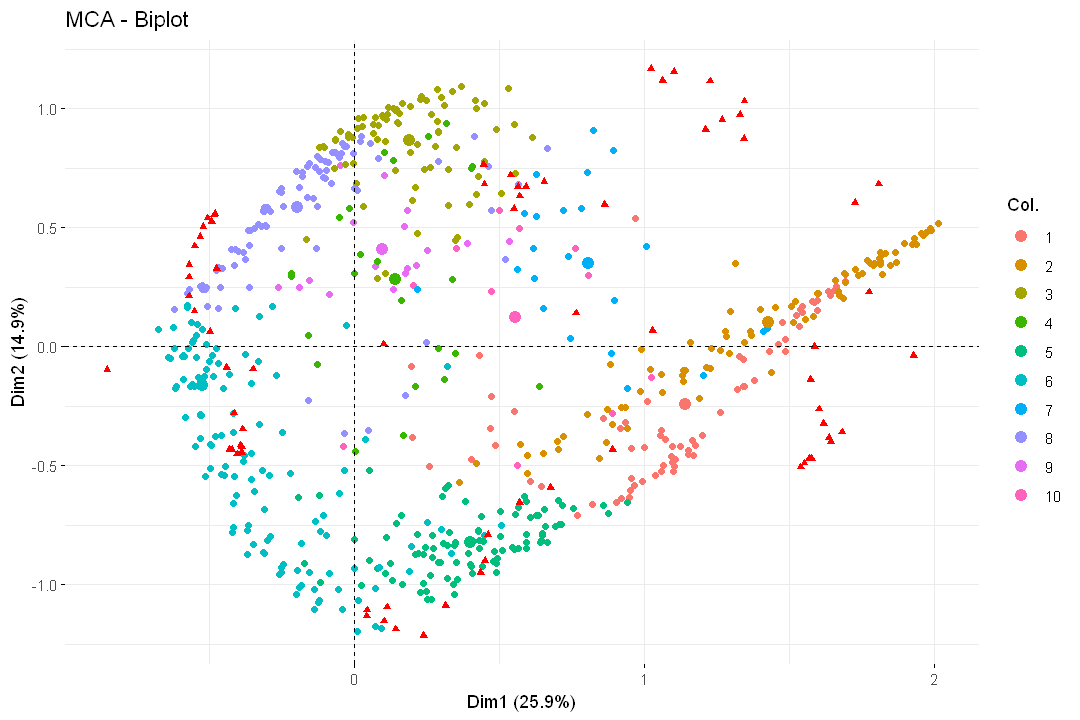

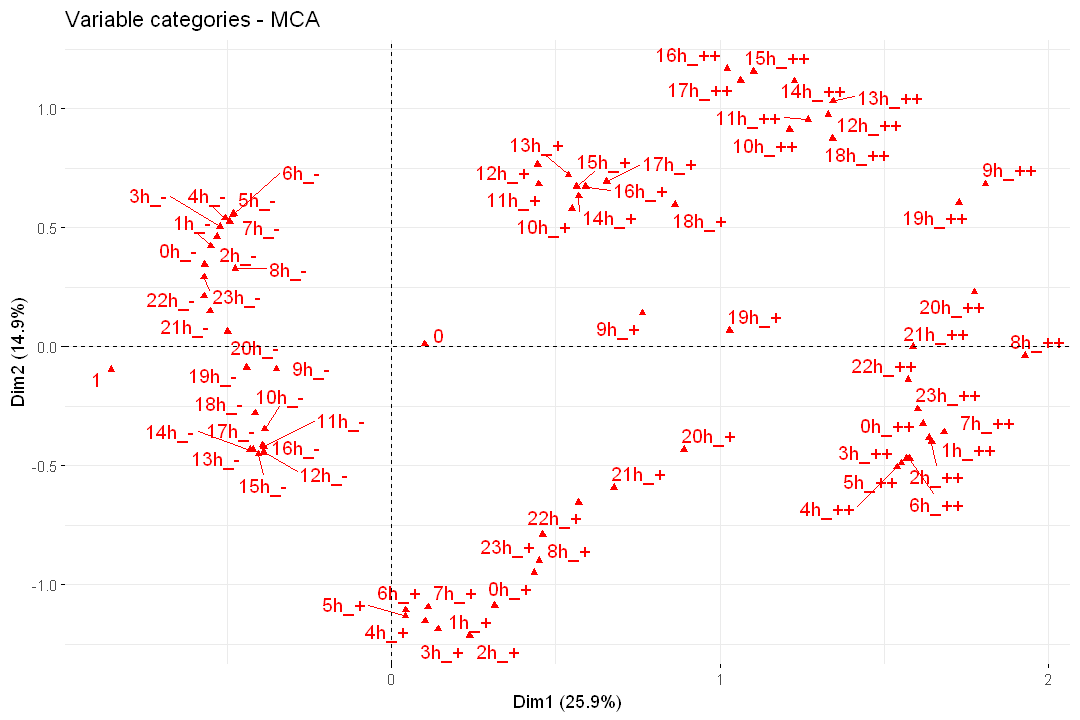

In [75]:
options(repr.plot.width = 9, repr.plot.height = 6)
fviz_mca_biplot(res.mca1, col.ind = as.factor(resBIC$classification), geom = c("point"))
fviz_mca_var(res.mca1, repel = TRUE)

In [76]:
cluster_palette <- colorFactor(c("#FF0000", "#0000FF", "#00FF00", "#FFFF00","#000000", "#FFFFFF","#FFA500", "#800080", "#FFC0CB", "#808080"), domain = unique(reskmeans$cluster))  # Utiliser la palette viridis avec 10 couleurs

leaflet(velib$position) %>% 
  addTiles(urlTemplate = "https://{s}.basemaps.cartocdn.com/light_all/{z}/{x}/{y}{r}.png", 
           attribution = 'Map tiles by Carto, under CC BY 3.0. Data by OpenStreetMap, under ODbL.') %>% 
  addCircleMarkers(radius = 3,
                   color = ~cluster_palette(reskmeans$cluster),
                   stroke = FALSE, 
                   fillOpacity = 0.9) %>%
addLegend(position = "bottomright", 
            pal = cluster_palette, 
            values = ~reskmeans$cluster,
            title = "Cluster",
            opacity = 1)

HTML widgets cannot be represented in plain text (need html)

In [77]:
contingency_table <- table(reskmeans$cluster, resBIC$classification)
contingency_table

    
       1   2   3   4   5   6   7   8   9  10
  1   33  58   0   0   0   0   0   0   0   0
  2    3   1   0   0  51  19   0   1   0   0
  3    1   0   0   0   0 418   0  19   0   0
  4    3   0   0   1  28 129   0   0   0   1
  5    0   0  55   4   0   0   2   7   3   5
  6   48   0   0   0  23   0   0   0   0   0
  7    0  15  30   3   0   0  13   3   0   0
  8    2  26   0   7   0  10   5   0   0   4
  9    1   0   2   5   0   5   0  40   6   1
  10   0   0   2   4   0   0   2  82   8   0

In [78]:
library(gplots)
library(graphics)


Attachement du package : 'gplots'


L'objet suivant est masqué depuis 'package:stats':

    lowess




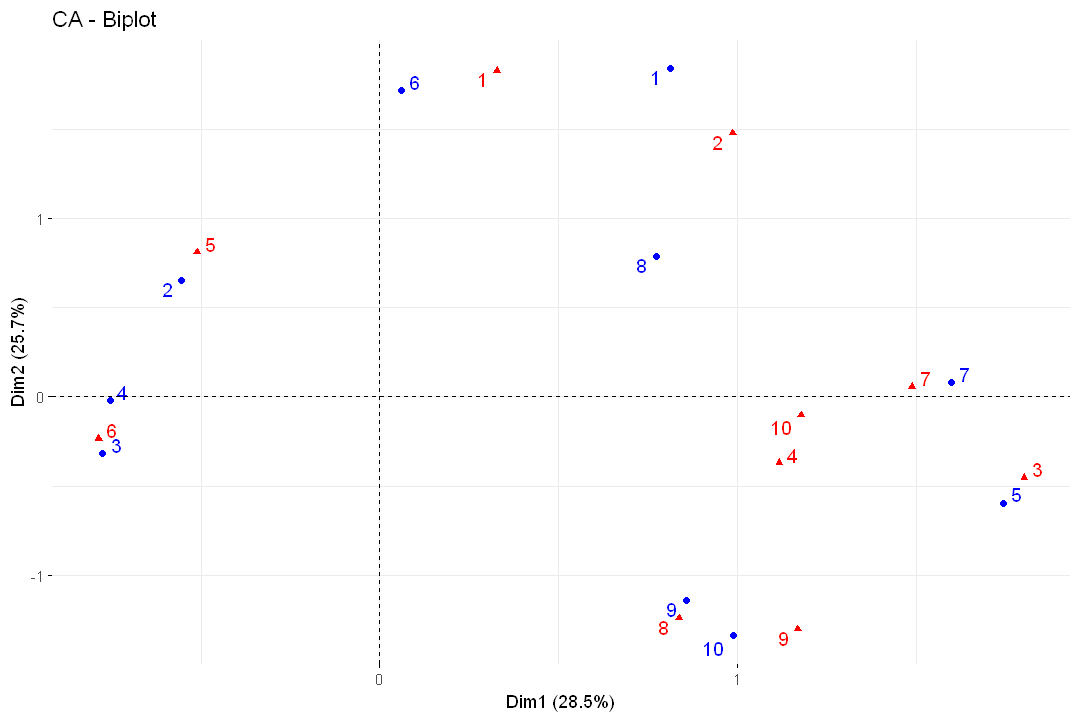

In [79]:
res.ca = CA(contingency_table, graph=FALSE)
fviz_ca_biplot(res.ca, repel=TRUE)

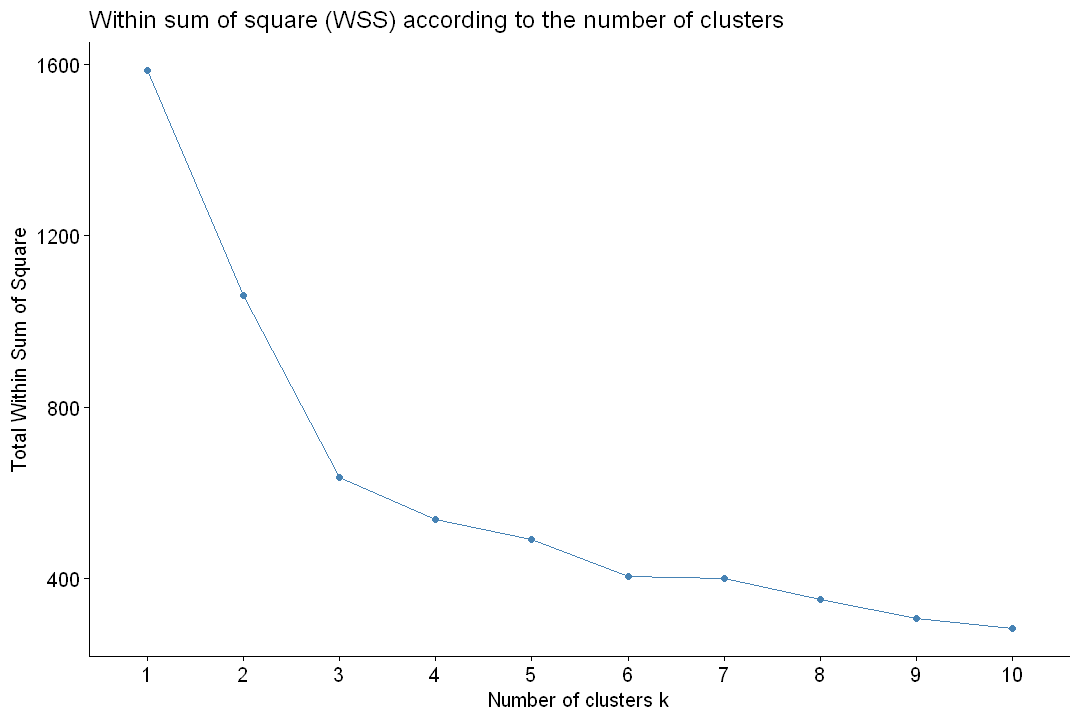

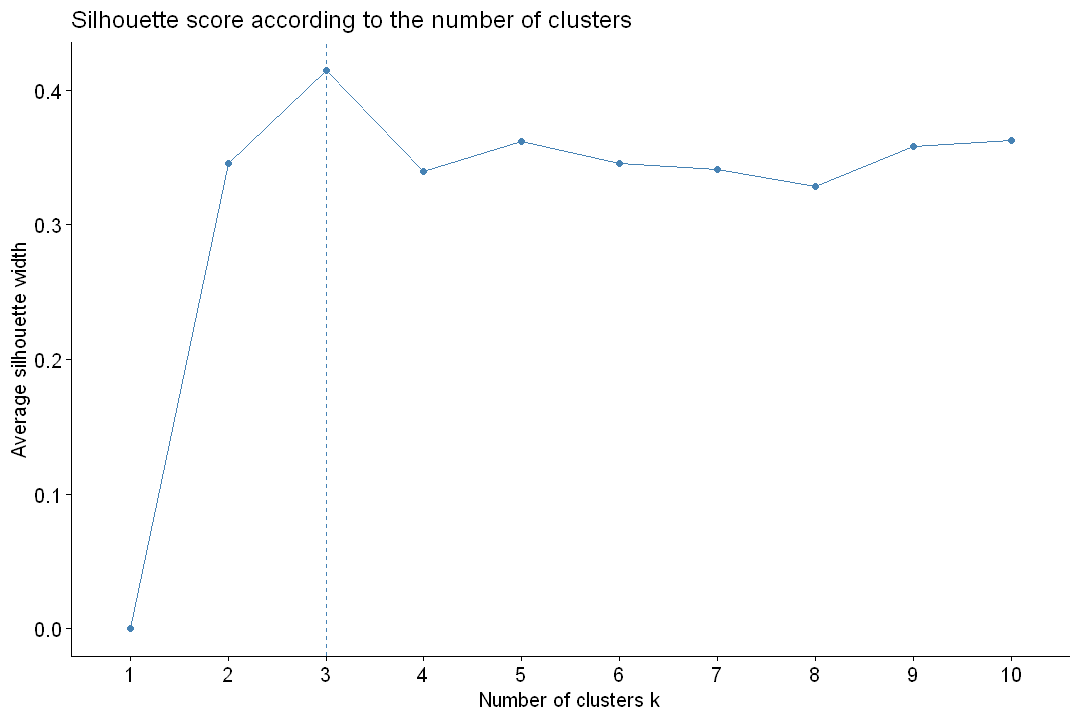

In [65]:
options(repr.plot.width = 9, repr.plot.height = 6)
fviz_nbclust(res.mca2$ind$coord, FUNcluster=kmeans, method="wss") +
    ggtitle("Within sum of square (WSS) according to the number of clusters")

fviz_nbclust(res.mca2$ind$coord, FUNcluster=kmeans, method="silhouette") +
    ggtitle("Silhouette score according to the number of clusters")

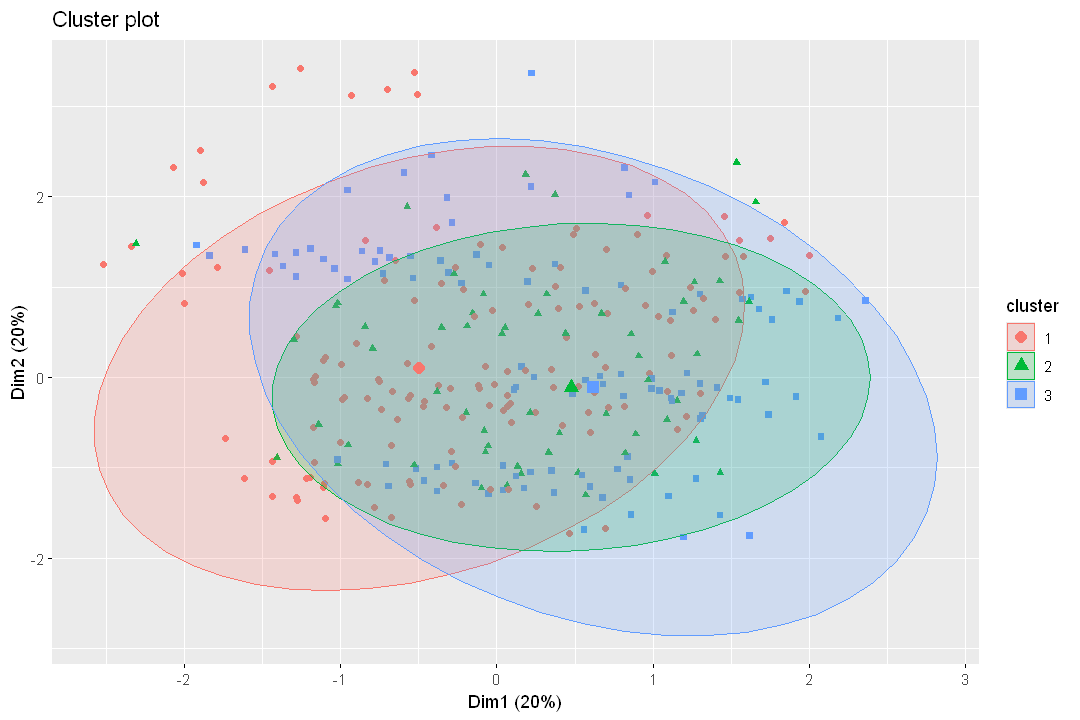

In [66]:
reskmeans = kmeans(res.mca2$ind$coord, centers=3) 

fviz_cluster(reskmeans, data=res.mca2$ind$coord, ellipse.type="norm", labelsize=8, geom=c("point"))

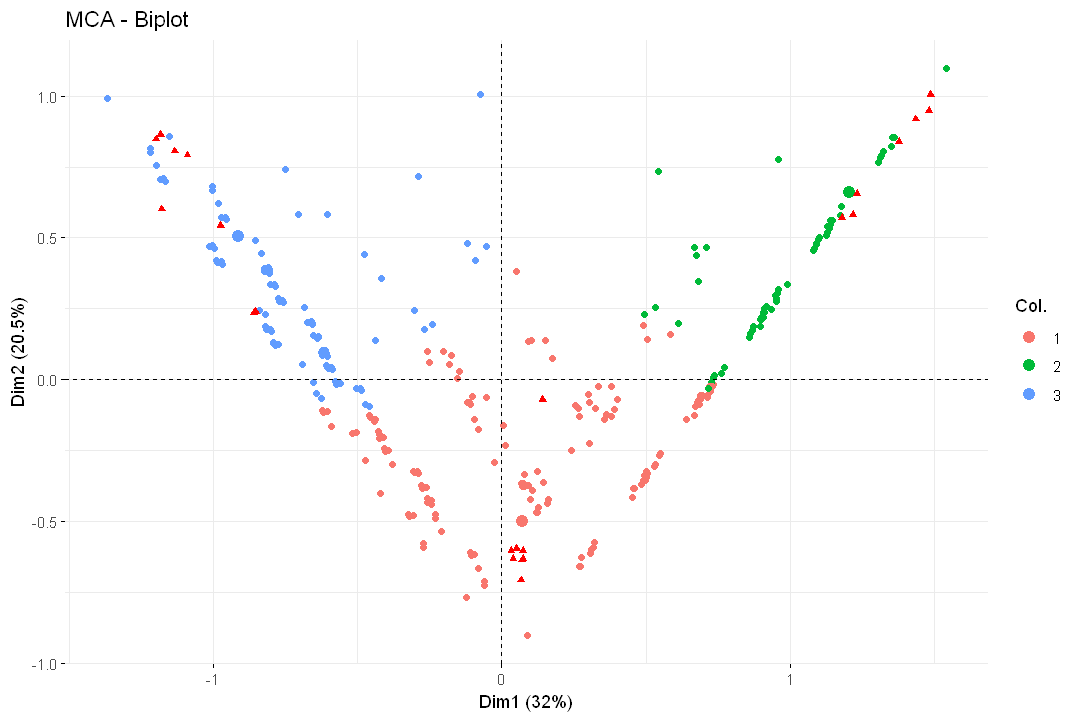

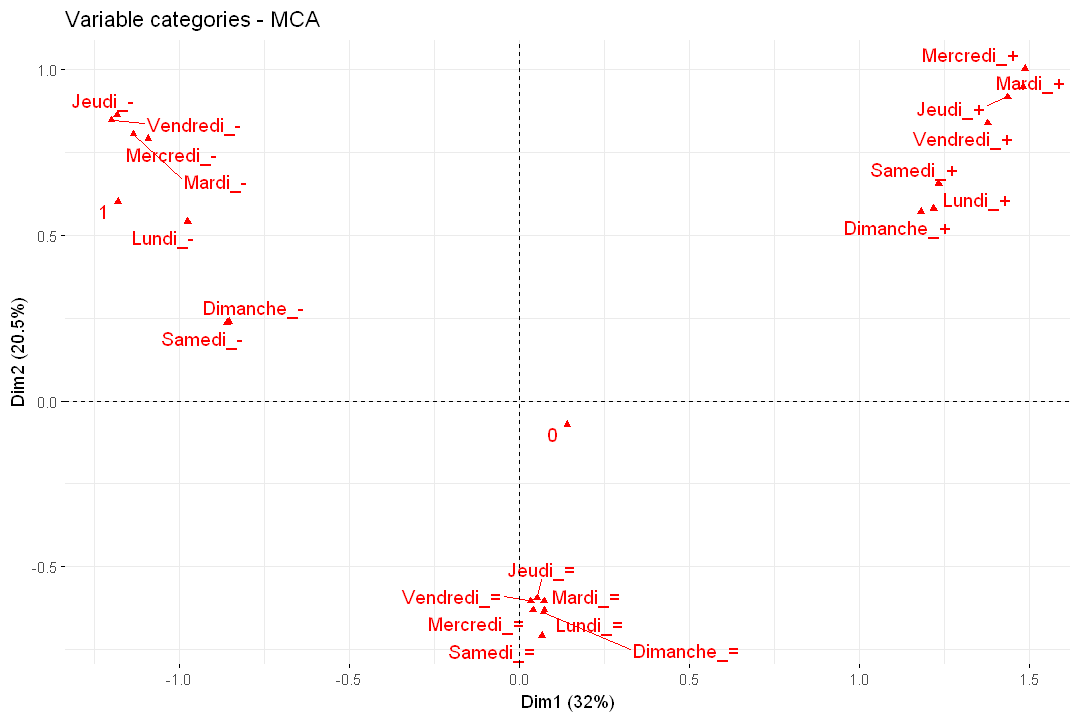

In [67]:
options(repr.plot.width = 9, repr.plot.height = 6)
fviz_mca_biplot(res.mca2, col.ind = as.factor(reskmeans$cluster), geom = c("point"))
fviz_mca_var(res.mca2, repel = TRUE)

In [70]:
cluster_palette <- colorFactor(c("#FF0000", "#0000FF", "#FFFF00"), domain = unique(reskmeans$cluster))  # Utiliser la palette viridis avec 10 couleurs

leaflet(velib$position) %>% 
  addTiles(urlTemplate = "https://{s}.basemaps.cartocdn.com/light_all/{z}/{x}/{y}{r}.png", 
           attribution = 'Map tiles by Carto, under CC BY 3.0. Data by OpenStreetMap, under ODbL.') %>% 
  addCircleMarkers(radius = 3,
                   color = ~cluster_palette(reskmeans$cluster),
                   stroke = FALSE, 
                   fillOpacity = 0.9) %>%
addLegend(position = "bottomright", 
            pal = cluster_palette, 
            values = ~reskmeans$cluster,
            title = "Cluster",
            opacity = 1)

HTML widgets cannot be represented in plain text (need html)

Best BIC values:
           EEV,20    EEV,17    EEV,18
BIC      6469.087 6323.8802 5957.3466
BIC diff    0.000 -145.2067 -511.7402

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEV (ellipsoidal, equal volume and shape) model with 20 components: 

 log-likelihood    n  df      BIC      ICL
       4381.644 1189 324 6469.087 6203.552

Clustering table:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
 27   9 174  18  50  37  81  32 129  10  58 126  65 161   8  57  14  80  44   9 

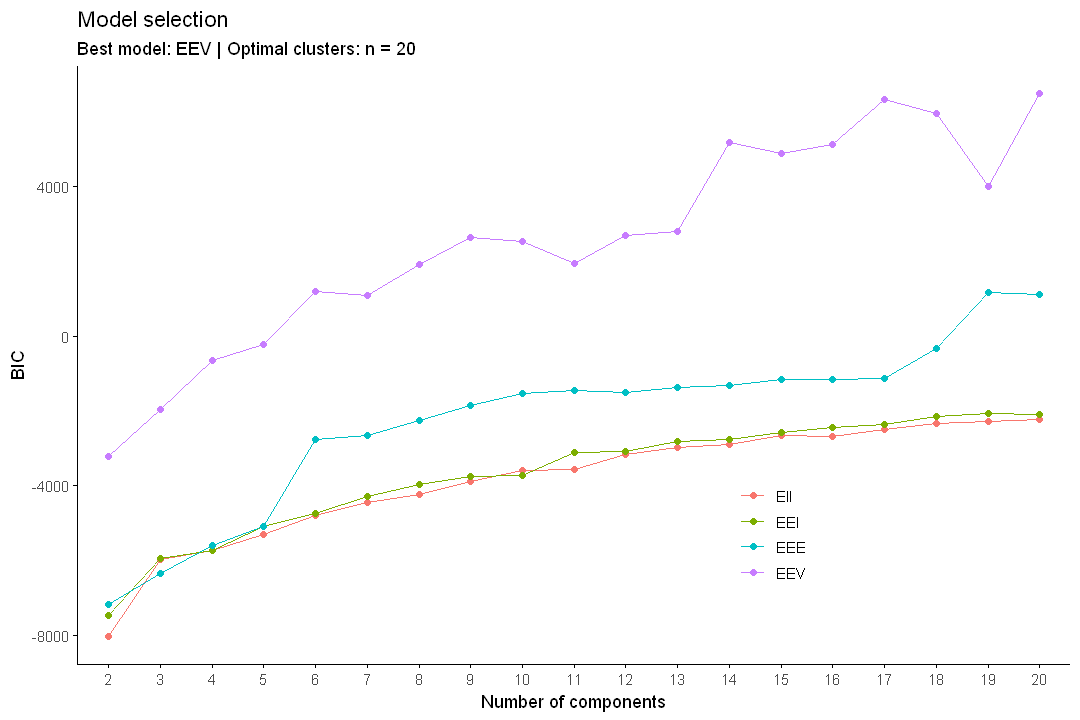

In [71]:
resBICall = mclustBIC(res.mca2$ind$coord, G=2:20)
summary(resBICall)

# --- #

resBICall = Mclust(res.mca2$ind$coord, G=2:20)
summary(resBICall)


fviz_mclust(resBICall, what="BIC")

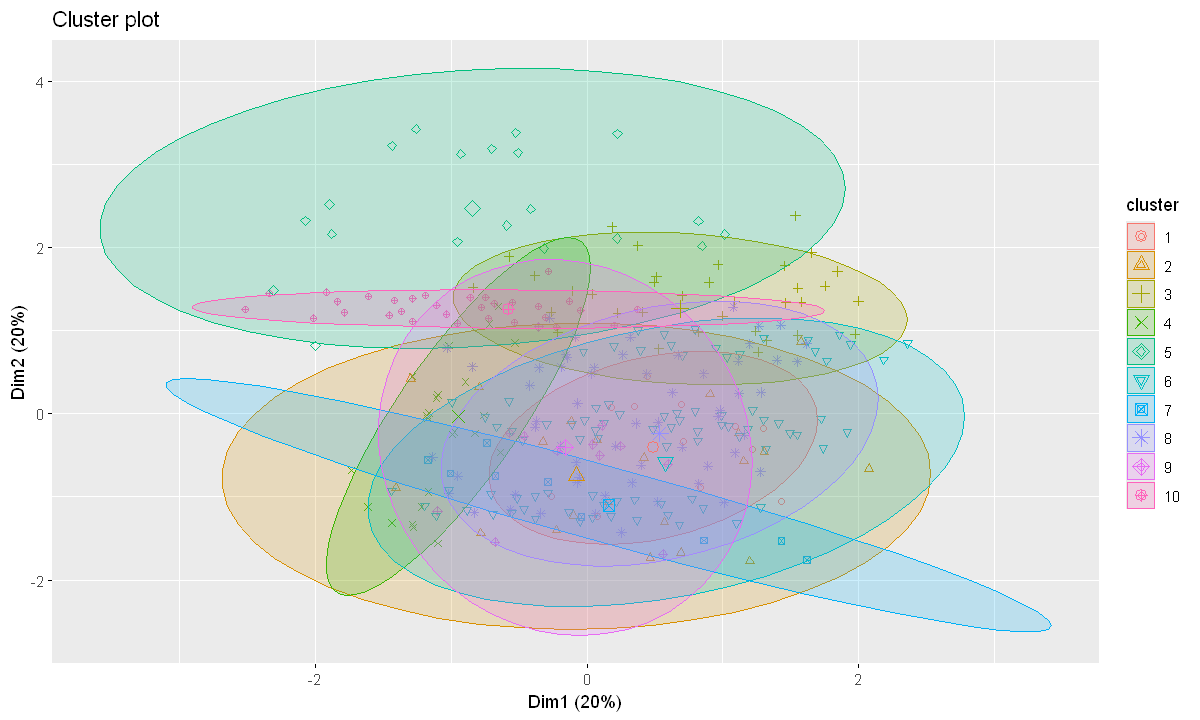

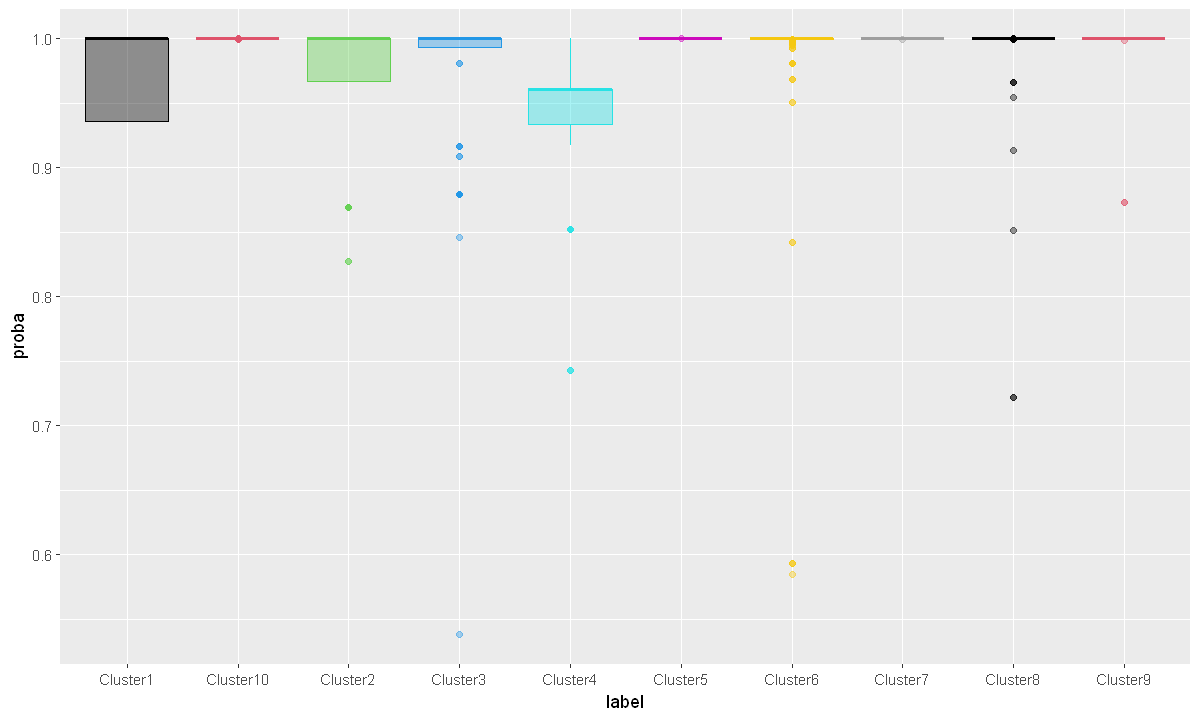

In [72]:
options(repr.plot.width = 10, repr.plot.height = 6)

resBIC = Mclust(res.mca2$ind$coord, G=10, modelNames = "EEV")
fviz_cluster(resBIC, data=res.mca2$ind$coord, ellipse.type="norm", geom="point")

# --- #

aux = data.frame(
    label = paste("Cluster", resBIC$classification, sep=""), 
    proba = apply(resBIC$z, 1, max))

ggplot(aux, aes(x=label, y=proba)) + 
    geom_boxplot(colour=1:10, fill=1:10, alpha=.4)

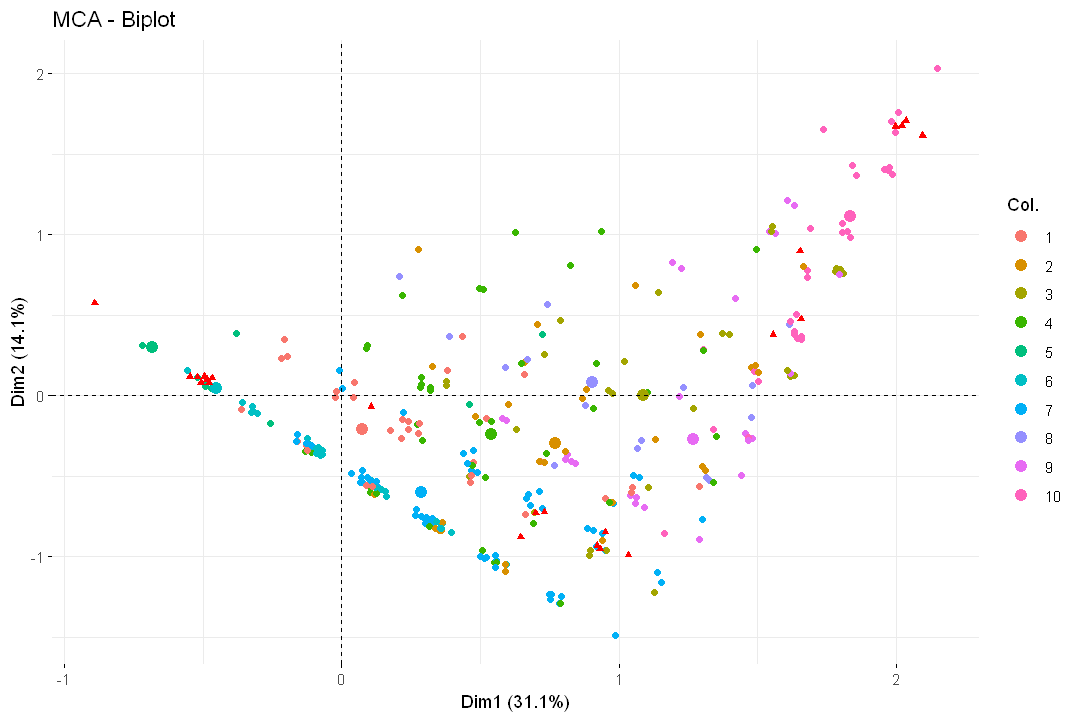

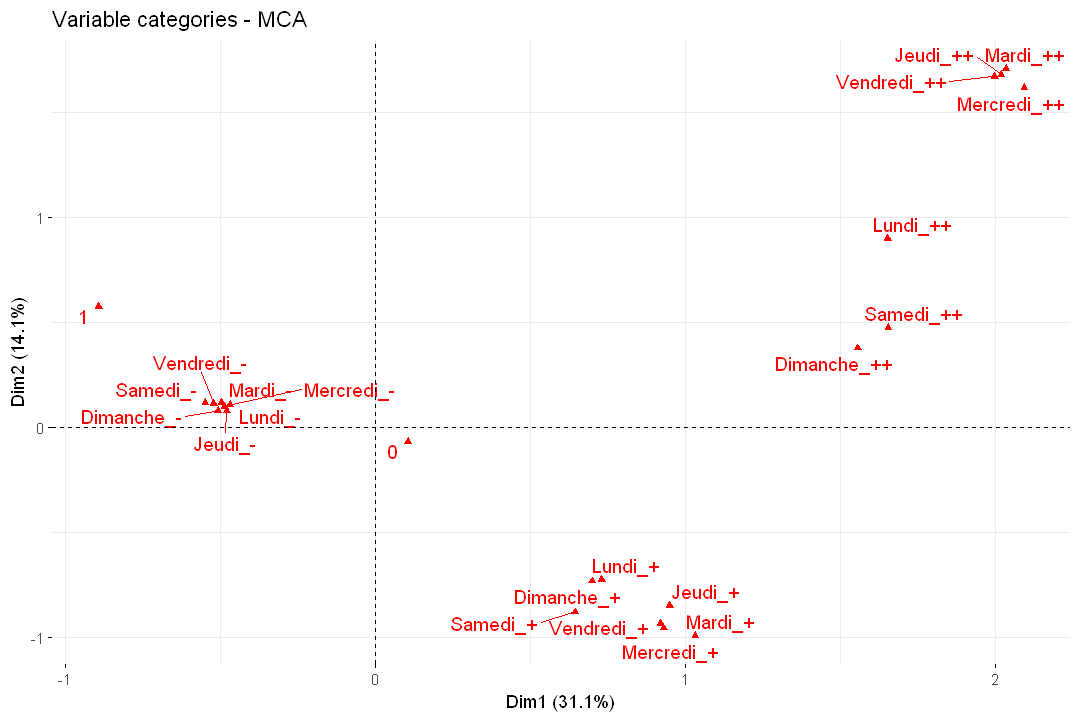

In [91]:
options(repr.plot.width = 9, repr.plot.height = 6)
fviz_mca_biplot(res.mca2, col.ind = as.factor(resBIC$classification), geom = c("point"))
fviz_mca_var(res.mca2, repel = TRUE)

In [92]:
cluster_palette <- colorFactor(c("#FF0000", "#0000FF", "#00FF00", "#FFFF00","#000000", "#FFFFFF","#FFA500", "#800080", "#FFC0CB", "#808080"), domain = unique(reskmeans$cluster))  # Utiliser la palette viridis avec 10 couleurs

leaflet(velib$position) %>% 
  addTiles(urlTemplate = "https://{s}.basemaps.cartocdn.com/light_all/{z}/{x}/{y}{r}.png", 
           attribution = 'Map tiles by Carto, under CC BY 3.0. Data by OpenStreetMap, under ODbL.') %>% 
  addCircleMarkers(radius = 3,
                   color = ~cluster_palette(reskmeans$cluster),
                   stroke = FALSE, 
                   fillOpacity = 0.9) %>%
addLegend(position = "bottomright", 
            pal = cluster_palette, 
            values = ~reskmeans$cluster,
            title = "Cluster",
            opacity = 1)

HTML widgets cannot be represented in plain text (need html)